In [2]:
import numpy as np
import pandas as pd

In [3]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms

# Function to calculate confidence interval (CI)
def calculate_confidence_interval(mean, std_dev, n, confidence_level=0.95):
    alpha = 1 - confidence_level
    z = stats.norm.ppf(1 - alpha / 2)  # Z critical value for confidence interval
    margin_of_error = z * (std_dev / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    return ci_lower, ci_upper

# Function to calculate p-value
def calculate_p_value(test_statistic, df, test_type='two-tailed'):
    if test_type == 'two-tailed':
        p_value = 2 * (1 - stats.t.cdf(abs(test_statistic), df))
    elif test_type == 'one-tailed':
        p_value = 1 - stats.t.cdf(test_statistic, df)
    return p_value

# Function to calculate z-score
def calculate_z_score(x, mean, std_dev):
    return (x - mean) / std_dev

# Function to calculate power of the test (for a two-sample test)
def calculate_power(effect_size, alpha=0.05, n=50, alternative='two-sided'):
    power_analysis = sms.TTestIndPower()
    power = power_analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, ratio=1.0, alternative=alternative)
    return power

# Function to calculate critical value (z or t)
def calculate_critical_value(alpha, distribution='z', df=None):
    if distribution == 'z':
        return stats.norm.ppf(1 - alpha / 2)
    elif distribution == 't' and df is not None:
        return stats.t.ppf(1 - alpha / 2, df)
    else:
        raise ValueError('Invalid distribution type or missing degrees of freedom.')

# Function to calculate standard error
def calculate_standard_error(std_dev, n):
    return std_dev / np.sqrt(n)

# Function to calculate margin of error
def calculate_margin_of_error(critical_value, std_err):
    return critical_value * std_err

# Function to calculate minimum detectable effect (MDE)
def calculate_mde(std_dev, alpha=0.05, power=0.8, n=50):
    effect_size = sms.TTestIndPower().solve_power(alpha=alpha, power=power, nobs1=n)
    mde = effect_size * std_dev
    return mde

# Example usage:
mean = 100
std_dev = 15
n = 30
confidence_level = 0.95
alpha = 0.05
x = 110  # Sample point for z-score calculation
df = n - 1

# Confidence Interval
ci_lower, ci_upper = calculate_confidence_interval(mean, std_dev, n, confidence_level)
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")

# Z-score
z_score = calculate_z_score(x, mean, std_dev)
print(f"Z-score: {z_score}")

# Power of the test
effect_size = 0.5  # Cohen's d
power = calculate_power(effect_size, alpha, n)
print(f"Statistical Power: {power}")

# Critical value (Z)
z_critical = calculate_critical_value(alpha)
print(f"Z Critical Value: {z_critical}")

# Standard Error
standard_error = calculate_standard_error(std_dev, n)
print(f"Standard Error: {standard_error}")

# Margin of Error
margin_of_error = calculate_margin_of_error(z_critical, standard_error)
print(f"Margin of Error: {margin_of_error}")

# Minimum Detectable Effect (MDE)
mde = calculate_mde(std_dev, alpha, power, n)
print(f"Minimum Detectable Effect (MDE): {mde}")

# P-value for a sample t-test
test_statistic = 2.5  # Example test statistic
p_value = calculate_p_value(test_statistic, df)
print(f"P-value: {p_value}")



Confidence Interval: (94.63241756884852, 105.36758243115148)
Z-score: 0.6666666666666666
Statistical Power: 0.4778965200281735
Z Critical Value: 1.959963984540054
Standard Error: 2.7386127875258306
Margin of Error: 5.3675824311514715
Minimum Detectable Effect (MDE): 7.499998030400507
P-value: 0.01832534433842614


In [ ]:
#distributions

In [ ]:
#binomial

The probability of exactly 10 successes: 0.0386


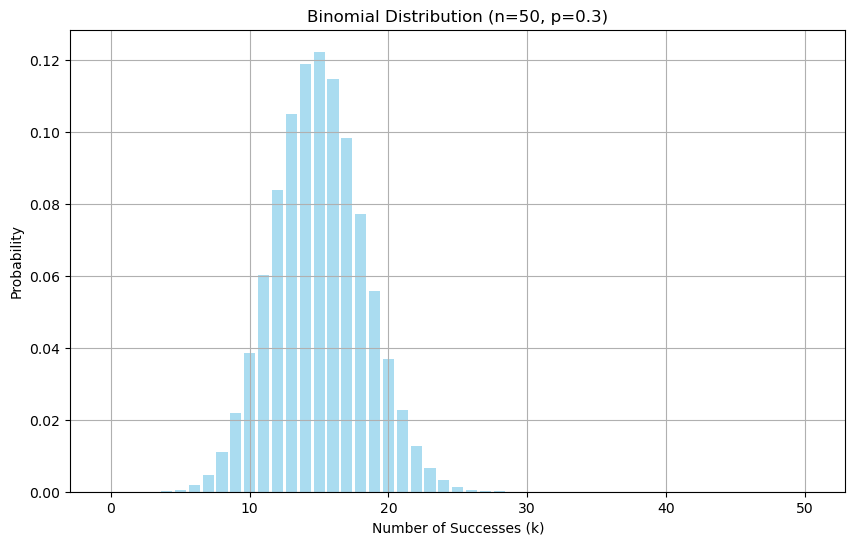

Marketing Example: Probability of exactly 10 customers opening the email: 0.1318653468


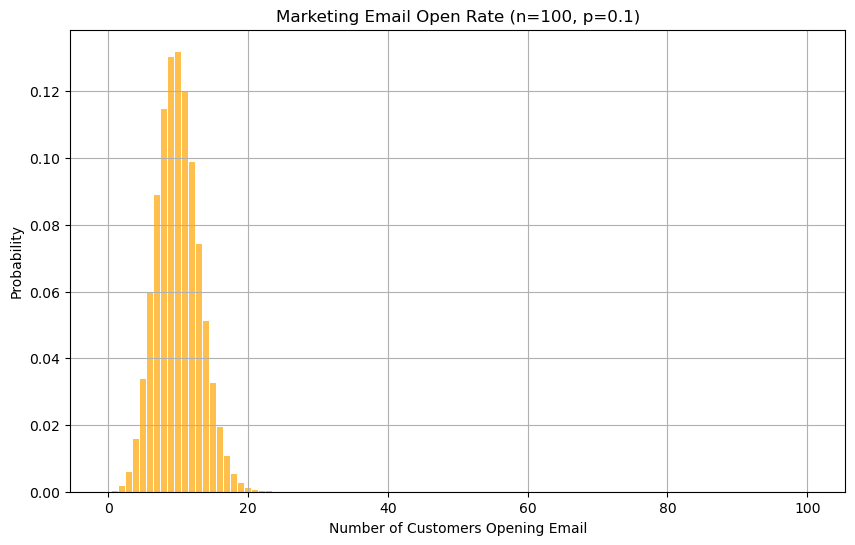

Digital Product Example: Probability of exactly 30 users subscribing to premium: 0.0788


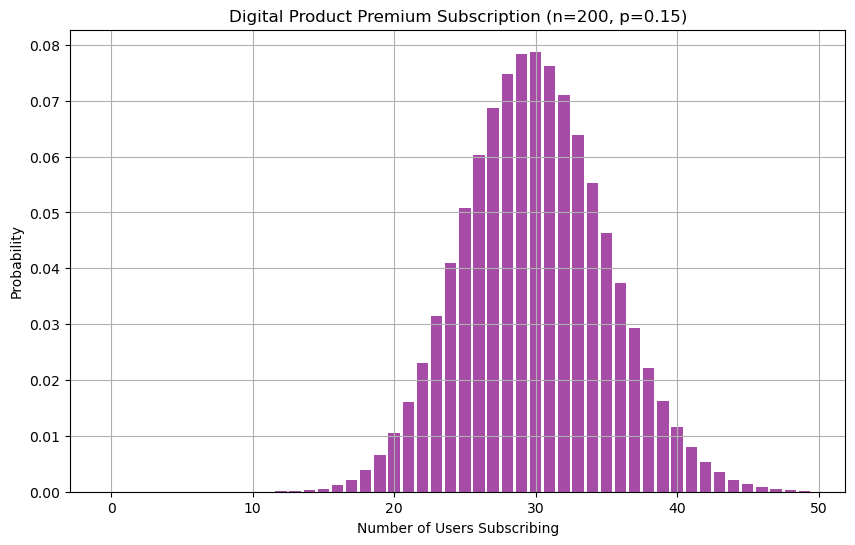

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

#General example
# Parameters for the binomial distribution
n = 50  # Number of trials
p = 0.3  # Probability of success
k = 10  # Number of successes

# 1. Calculate the probability of exactly k successes
probability = binom.pmf(k, n, p)
print(f"The probability of exactly {k} successes: {probability:.4f}")


# 3. Plot the binomial distribution
x = np.arange(0, n+1)  # All possible outcomes
pmf_values = binom.pmf(x, n, p)

plt.figure(figsize=(10,6))
plt.bar(x, pmf_values, color='skyblue', alpha=0.7)
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("Number of Successes (k)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

#Marketing Example 
n_marketing = 100  # Number of customers
p_marketing = 0.10  # Probability of email being opened
k_marketing = 10  # Example number of customers opening the email

probability_marketing = binom.pmf(k_marketing, n_marketing, p_marketing)
print(f"Marketing Example: Probability of exactly {k_marketing} customers opening the email: {probability_marketing:.10f}")

# Plotting the marketing example
x_marketing = np.arange(0, n_marketing + 1)
pmf_values_marketing = binom.pmf(x_marketing, n_marketing, p_marketing)

plt.figure(figsize=(10,6))
plt.bar(x_marketing, pmf_values_marketing, color='orange', alpha=0.7)  
plt.title(f"Marketing Email Open Rate (n={n_marketing}, p={p_marketing})")
plt.xlabel("Number of Customers Opening Email")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

# Product Example
n_digital = 200  # Number of free-trial users
p_digital = 0.15  # Probability of subscribing to premium
k_digital = 30  # Example number of users subscribing to premium

probability_digital = binom.pmf(k_digital, n_digital, p_digital)
print(f"Digital Product Example: Probability of exactly {k_digital} users subscribing to premium: {probability_digital:.4f}")

# 2. Plot the digital product example
x_digital = np.arange(0, n_digital + 1)  # All possible outcomes
pmf_values_digital = binom.pmf(x_digital, n_digital, p_digital)

plt.figure(figsize=(10, 6))
plt.bar(x_digital[:50], pmf_values_digital[:50], color='purple', alpha=0.7)  # First 50 bars for clarity
plt.title(f"Digital Product Premium Subscription (n={n_digital}, p={p_digital})")
plt.xlabel("Number of Users Subscribing")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

In [ ]:
#poisson

Marketing Example: Probability of exactly 5 inquiries in an hour: 0.0031


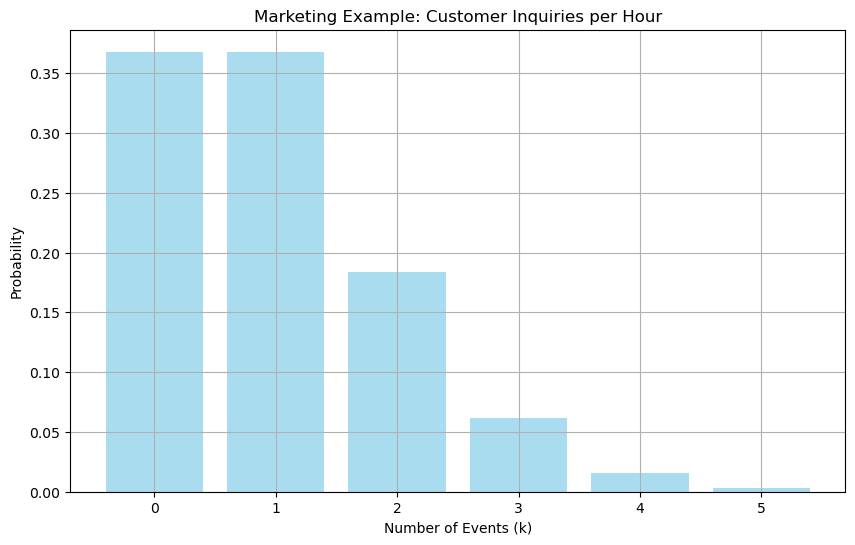

In [19]:
# --- Marketing Example ---
lambda_marketing = 1  # Average inquiries per hour
k_marketing = 5  # Number of inquiries of interest

probability_marketing = poisson.pmf(k_marketing, lambda_marketing)
print(f"Marketing Example: Probability of exactly {k_marketing} inquiries in an hour: {probability_marketing:.4f}")


# Plot the Poisson distribution for marketing example
x = np.arange(0, 6)  # Range of possible outcomes (e.g., 0 to 14 inquiries)
pmf_values = poisson.pmf(x, lambda_marketing)  # Calculate PMF for each value of x

plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values, color='skyblue', alpha=0.7)
plt.title("Marketing Example: Customer Inquiries per Hour")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()




In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Given parameters
lambda_marketing = 2  # Average number of purchases (λ)
num_customers = 50    # Number of customers in the current campaign

# Simulate the number of purchases for the current campaign
simulated_purchases = poisson.rvs(lambda_marketing)

# Output the simulated number of purchases
print(f"Simulated number of purchases in the current campaign: {simulated_purchases}")

Simulated number of purchases in the current campaign: 3


Product Example: Probability of exactly 2 crashes per month: 0.2240


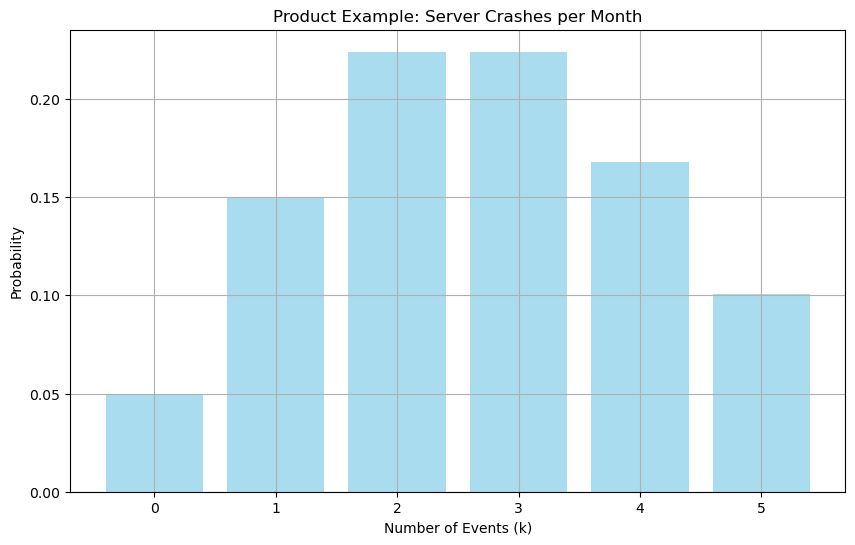

In [23]:
# Product Example 
lambda_product = 3  # Average crashes per month
k_product = 2  # Number of crashes of interest

probability_product = poisson.pmf(k_product, lambda_product)
print(f"Product Example: Probability of exactly {k_product} crashes per month: {probability_product:.4f}")


# Plot the Poisson distribution for marketing example
x = np.arange(0, 6)  # Range of possible outcomes (e.g., 0 to 14 inquiries)
pmf_values = poisson.pmf(x, lambda_product)  # Calculate PMF for each value of x

plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values, color='skyblue', alpha=0.7)
plt.title("Product Example: Server Crashes per Month")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

In [ ]:
#bernoulli distribution

Estimated probability of success (email opened): 0.3500
Probability of success (email opened): 0.3500
Probability of failure (email not opened): 0.6500


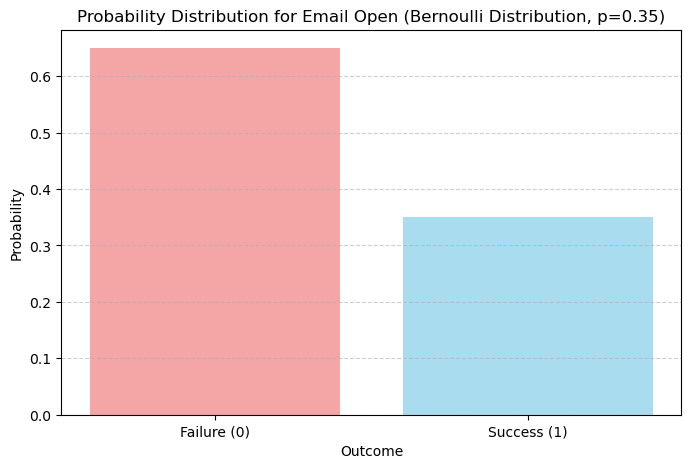

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

#Past data
total_emails_sent = 100
emails_opened = 35

# Estimating probability of success (p)
p_estimated = emails_opened / total_emails_sent
print(f"Estimated probability of success (email opened): {p_estimated:.4f}")

k = 1  # We want to know the probability of success (email opened)

# 1. Calculate the probability of success (email opened)
prob_success = bernoulli.pmf(k, p_estimated)
print(f"Probability of success (email opened): {prob_success:.4f}")

# 2. Calculate the probability of failure (email not opened)
prob_failure = bernoulli.pmf(0, p_estimated)
print(f"Probability of failure (email not opened): {prob_failure:.4f}")

labels = ['Failure (0)', 'Success (1)']
values = [prob_failure, prob_success]


# Plotting the distribution of results (Success vs Failure)
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['lightcoral', 'skyblue'], alpha=0.7)
plt.title(f"Probability Distribution for Email Open (Bernoulli Distribution, p={p_estimated:.2f})")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
#geometric

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Marketing Example (p = probability of email opened)
p_marketing = 0.2  # Probability of success (email opened)

# Simulate the probability of first success for trials 1 through 10
k_values = np.arange(1, 11)  # k = 1 to 10
prob_success_values = geom.pmf(k_values, p_marketing)

n_trials_success = 1/p_marketing

print(f"Marketing Example: how many emails  sent until you get the first response: {n_trials_success}") 



Marketing Example: how many emails  sent until you get the first response: 5.0


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Marketing Example (p = probability of email opened)
p_product = 0.05  # Probability of success (email opened)

# Simulate the probability of first success for trials 1 through 10
k_values = np.arange(1, 11)  # k = 1 to 10
prob_success_values = geom.pmf(k_values, p_product)

n_trials_success = 1/p_product

print(f"Product Example: how many visits until you get the first purchase: {n_trials_success}") 

Product Example: how many visits until you get the first purchase: 20.0


In [ ]:
#continous


In [ ]:
#exponential

Time-to-Churn Example: Probability a customer churns within 15 days: 0.3935


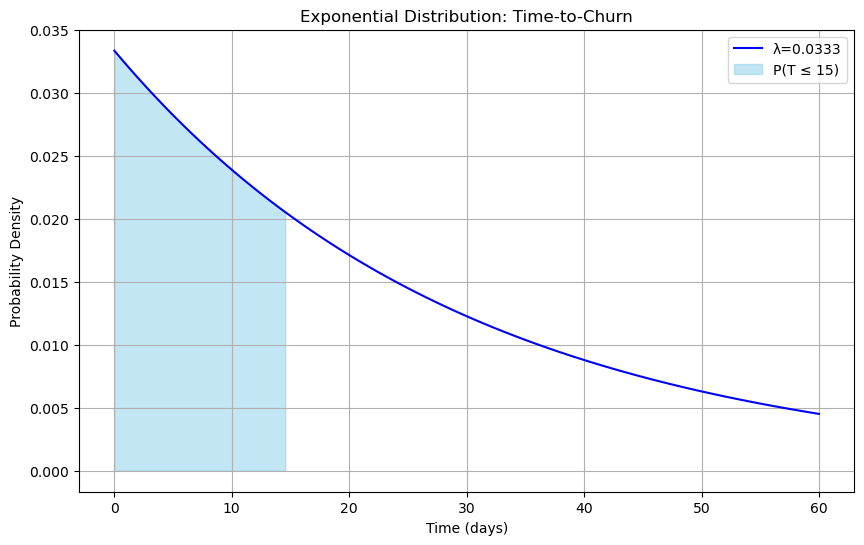

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# --- Time-to-Churn Example ---
mean_time_to_churn = 30  # Average engagement time in days
lambda_churn = 1 / mean_time_to_churn  # Rate of churn
time_threshold_churn = 15  # Time of interest (days)

# Probability of churn within the threshold
prob_churn = expon.cdf(time_threshold_churn, scale=1/lambda_churn)
print(f"Time-to-Churn Example: Probability a customer churns within {time_threshold_churn} days: {prob_churn:.4f}")
# --- Plot for Time-to-Churn ---
x_vals_churn = np.linspace(0, 60, 100)  # Time values (e.g., 0 to 60 days)
pdf_churn = expon.pdf(x_vals_churn, scale=1/lambda_churn)

plt.figure(figsize=(10, 6))
plt.plot(x_vals_churn, pdf_churn, color='blue', label=f"λ={lambda_churn:.4f}")
plt.fill_between(x_vals_churn, pdf_churn, where=(x_vals_churn <= time_threshold_churn), color='skyblue', alpha=0.5, label=f"P(T ≤ {time_threshold_churn})")
plt.title("Exponential Distribution: Time-to-Churn")
plt.xlabel("Time (days)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

Session Duration Example: Probability of next session within 2 minutes: 0.3297


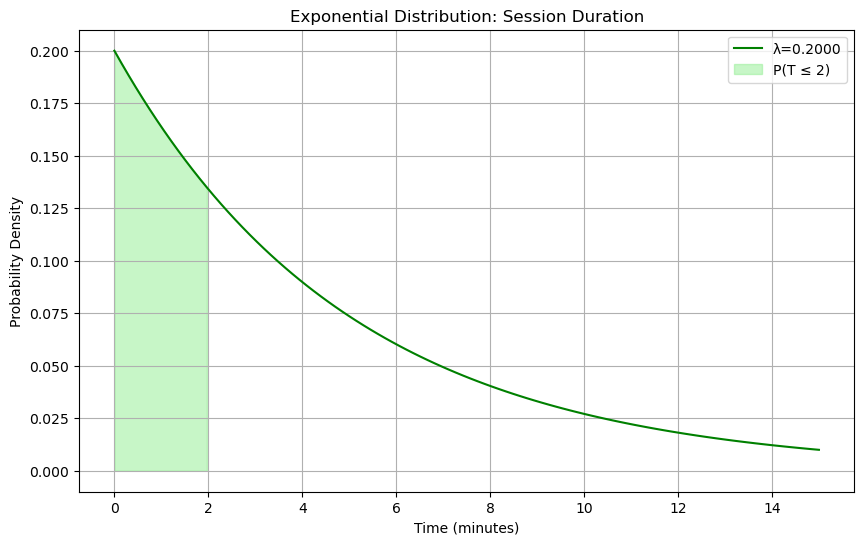

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


# --- Session Duration Example ---
mean_session_duration = 5  # Average session interval in minutes
lambda_session = 1 / mean_session_duration  # Rate of session occurrence
time_threshold_session = 2  # Time of interest (minutes)

# Probability of session within the threshold
prob_session = expon.cdf(time_threshold_session, scale=1/lambda_session)
print(f"Session Duration Example: Probability of next session within {time_threshold_session} minutes: {prob_session:.4f}")

# --- Plot for Session Duration ---
x_vals_session = np.linspace(0, 15, 100)  # Time values (e.g., 0 to 15 minutes)
pdf_session = expon.pdf(x_vals_session, scale=1/lambda_session)

plt.figure(figsize=(10, 6))
plt.plot(x_vals_session, pdf_session, color='green', label=f"λ={lambda_session:.4f}")
plt.fill_between(x_vals_session, pdf_session, where=(x_vals_session <= time_threshold_session), color='lightgreen', alpha=0.5, label=f"P(T ≤ {time_threshold_session})")
plt.title("Exponential Distribution: Session Duration")
plt.xlabel("Time (minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#uniform


Marketing Example: Probability of response within 3 hours: 0.2500


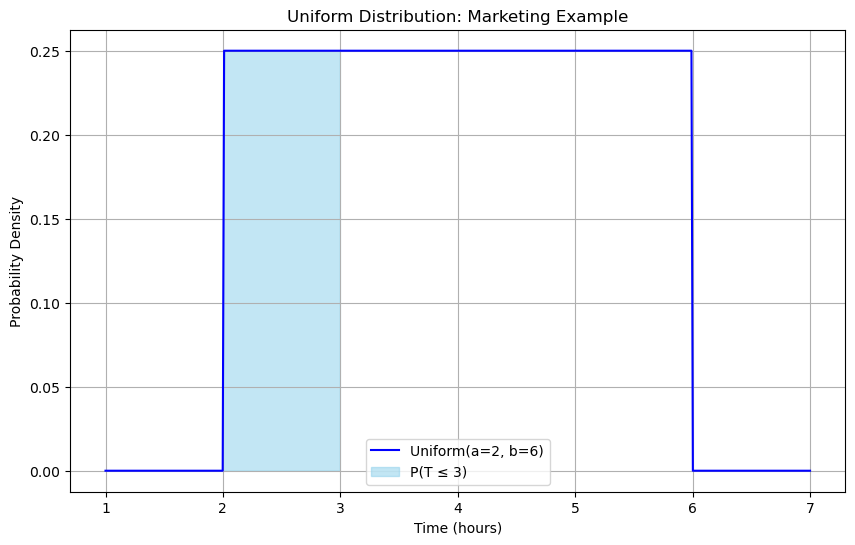

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# --- Marketing Example ---
a_marketing = 2  # Minimum time (hours)
b_marketing = 6  # Maximum time (hours)
x_marketing = 3  # Time threshold (hours)

# PDF and CDF calculations
prob_marketing = uniform.cdf(x_marketing, loc=a_marketing, scale=b_marketing - a_marketing)
print(f"Marketing Example: Probability of response within {x_marketing} hours: {prob_marketing:.4f}")


# --- Plot for Marketing Example ---
x_vals_marketing = np.linspace(a_marketing - 1, b_marketing + 1, 500)
pdf_marketing = uniform.pdf(x_vals_marketing, loc=a_marketing, scale=b_marketing - a_marketing)

plt.figure(figsize=(10, 6))
plt.plot(x_vals_marketing, pdf_marketing, color='blue', label=f"Uniform(a={a_marketing}, b={b_marketing})")
plt.fill_between(x_vals_marketing, pdf_marketing, where=(x_vals_marketing <= x_marketing), color='skyblue', alpha=0.5, label=f"P(T ≤ {x_marketing})")
plt.title("Uniform Distribution: Marketing Example")
plt.xlabel("Time (hours)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()



Digital Product Example: Probability of task completed within 2 minutes: 0.2500


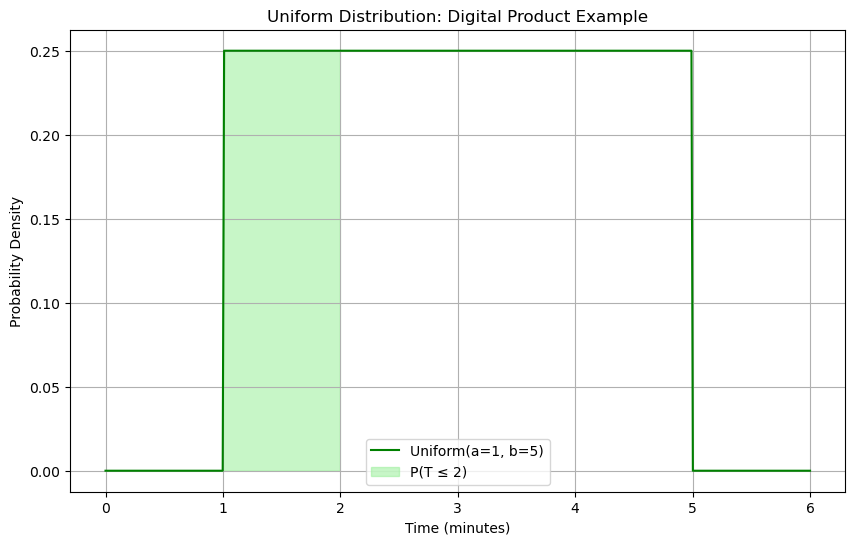

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# --- Digital Product Example ---
a_product = 1  # Minimum time (minutes)
b_product = 5  # Maximum time (minutes)
x_product = 2  # Time threshold (minutes)

# PDF and CDF calculations
prob_product = uniform.cdf(x_product, loc=a_product, scale=b_product - a_product)
print(f"Digital Product Example: Probability of task completed within {x_product} minutes: {prob_product:.4f}")


# --- Plot for Digital Product Example ---
x_vals_product = np.linspace(a_product - 1, b_product + 1, 500)
pdf_product = uniform.pdf(x_vals_product, loc=a_product, scale=b_product - a_product)

plt.figure(figsize=(10, 6))
plt.plot(x_vals_product, pdf_product, color='green', label=f"Uniform(a={a_product}, b={b_product})")
plt.fill_between(x_vals_product, pdf_product, where=(x_vals_product <= x_product), color='lightgreen', alpha=0.5, label=f"P(T ≤ {x_product})")
plt.title("Uniform Distribution: Digital Product Example")
plt.xlabel("Time (minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#normal

Marketing Example: Probability of response within 8 days: 0.1587


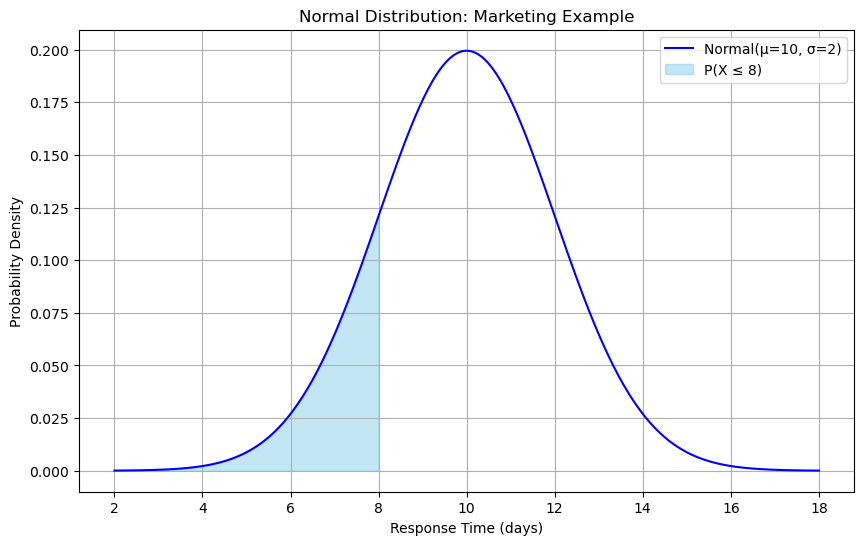

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Marketing Example ---
mu_marketing = 10  # Mean response time (days)
sigma_marketing = 2  # Standard deviation (days)
x_marketing = 8  # Response time threshold (days)

# Calculate CDF for P(X ≤ x)
prob_marketing = norm.cdf(x_marketing, loc=mu_marketing, scale=sigma_marketing)
print(f"Marketing Example: Probability of response within {x_marketing} days: {prob_marketing:.4f}")


# --- Plot for Marketing Example ---
x_vals_marketing = np.linspace(mu_marketing - 4 * sigma_marketing, mu_marketing + 4 * sigma_marketing, 500)
pdf_marketing = norm.pdf(x_vals_marketing, loc=mu_marketing, scale=sigma_marketing)

plt.figure(figsize=(10, 6))
plt.plot(x_vals_marketing, pdf_marketing, color='blue', label=f"Normal(μ={mu_marketing}, σ={sigma_marketing})")
plt.fill_between(x_vals_marketing, pdf_marketing, where=(x_vals_marketing <= x_marketing), color='skyblue', alpha=0.5, label=f"P(X ≤ {x_marketing})")
plt.title("Normal Distribution: Marketing Example")
plt.xlabel("Response Time (days)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()




Digital Product Example: Probability of session lasting more than 35 minutes: 0.1587


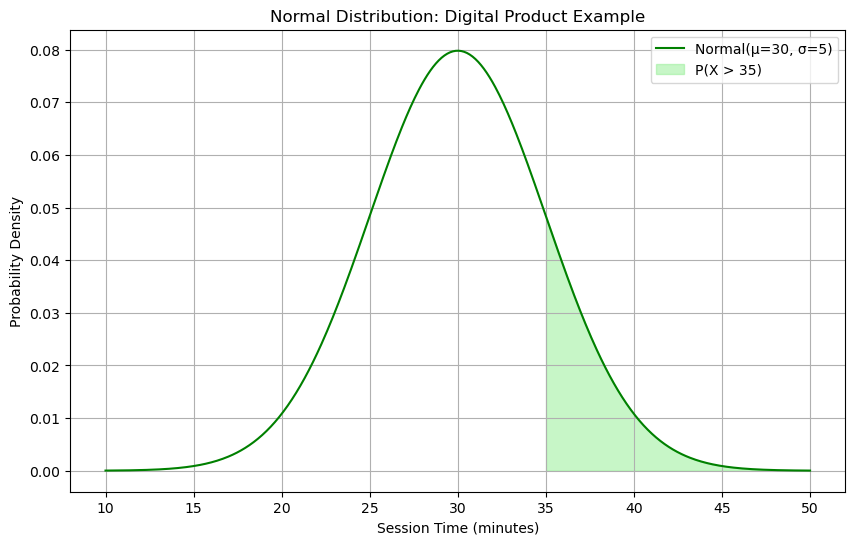

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Digital Product Example ---
mu_product = 30  # Mean session time (minutes)
sigma_product = 5  # Standard deviation (minutes)
x_product = 35  # Session time threshold (minutes)

# Calculate 1 - CDF for P(X > x)
prob_product = 1 - norm.cdf(x_product, loc=mu_product, scale=sigma_product)
print(f"Digital Product Example: Probability of session lasting more than {x_product} minutes: {prob_product:.4f}")

# --- Plot for Digital Product Example ---
x_vals_product = np.linspace(mu_product - 4 * sigma_product, mu_product + 4 * sigma_product, 500)
pdf_product = norm.pdf(x_vals_product, loc=mu_product, scale=sigma_product)

plt.figure(figsize=(10, 6))
plt.plot(x_vals_product, pdf_product, color='green', label=f"Normal(μ={mu_product}, σ={sigma_product})")
plt.fill_between(x_vals_product, pdf_product, where=(x_vals_product >= x_product), color='lightgreen', alpha=0.5, label=f"P(X > {x_product})")
plt.title("Normal Distribution: Digital Product Example")
plt.xlabel("Session Time (minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#tests

In [ ]:
#t test


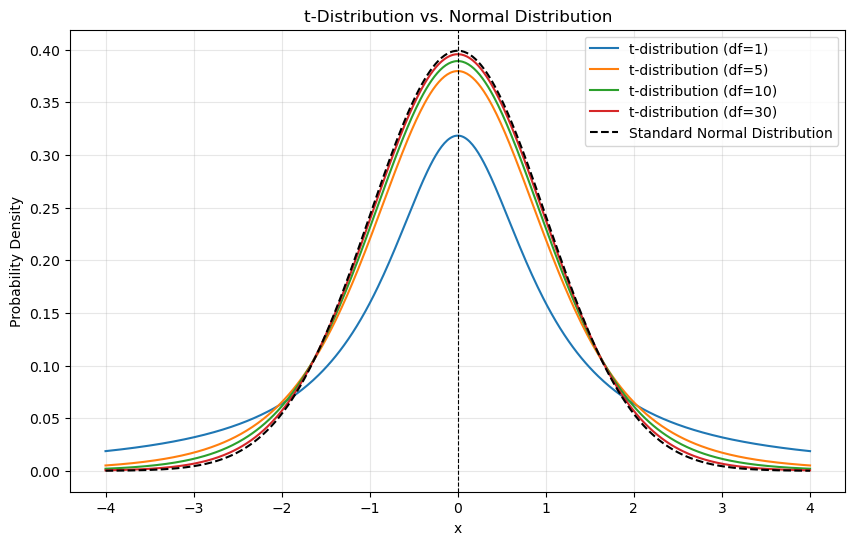

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Degrees of freedom
df_values = [1, 5, 10, 30]  # Different df values
x = np.linspace(-4, 4, 500)

# Plot t-distributions
plt.figure(figsize=(10, 6))
for df in df_values:
    plt.plot(x, t.pdf(x, df), label=f"t-distribution (df={df})")

# Plot standard normal distribution
plt.plot(x, norm.pdf(x), 'k--', label="Standard Normal Distribution", linewidth=1.5)

# Add labels and legend
plt.title("t-Distribution vs. Normal Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


T-statistic: 8.419124467825245
P-value: 1.4686423914868116e-05
Degrees of Freedom: 9
Critical Value (α = 0.05): 2.2621571627409915


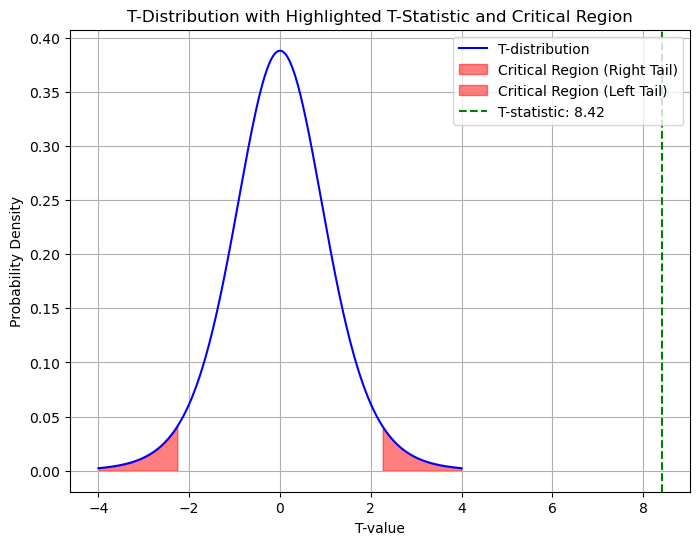

Reject the null hypothesis: The average sales during the campaign are significantly different from the historical average.


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Simulated sales data during the marketing campaign (in dollars)
sales_data = np.array([11500, 12000, 11000, 12500, 13000, 13500, 14000, 12500, 11800, 12400])

# Historical average sales (population mean) of $10,000 per week
historical_average_sales = 10000

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(sales_data, historical_average_sales)

# Degrees of freedom
df = len(sales_data) - 1

# Critical value for a two-tailed test at alpha = 0.05
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)  # For two-tailed test

# Output the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {df}")
print(f"Critical Value (α = 0.05): {critical_value}")

# Plotting the T-distribution and highlighting the T-statistic
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="T-distribution", color="blue")
plt.fill_between(x, y, where=(x >= critical_value), color="red", alpha=0.5, label="Critical Region (Right Tail)")
plt.fill_between(x, y, where=(x <= -critical_value), color="red", alpha=0.5, label="Critical Region (Left Tail)")

# Highlight the T-statistic
plt.axvline(x=t_stat, color='green', linestyle='--', label=f"T-statistic: {t_stat:.2f}")

# Labels and title
plt.title("T-Distribution with Highlighted T-Statistic and Critical Region")
plt.xlabel("T-value")
plt.ylabel("Probability Density")
plt.legend(loc="best")
plt.grid(True)

# Show the plot
plt.show()

# Interpretation based on the T-statistic and critical value
if abs(t_stat) > critical_value:
    print("Reject the null hypothesis: The average sales during the campaign are significantly different from the historical average.")
else:
    print("Fail to reject the null hypothesis: The average sales during the campaign are not significantly different from the historical average.")


In [ ]:
#z-test

In [63]:
import scipy.stats as stats

# Given confidence level (1 - alpha) for a two-tailed test
confidence_level = 0.95  # Example: 95% confidence level
alpha = 1 - confidence_level  # Calculate alpha

# For a two-tailed test
z_critical_two_tailed = stats.norm.ppf(1 - alpha/2)

# For a one-tailed test
z_critical_one_tailed = stats.norm.ppf(1 - alpha)

# Display the results
print(f"Z-Critical Value (Two-Tailed, {confidence_level*100}% confidence): {z_critical_two_tailed:.4f}")
print(f"Z-Critical Value (One-Tailed, {confidence_level*100}% confidence): {z_critical_one_tailed:.4f}")


Z-Critical Value (Two-Tailed, 95.0% confidence): 1.9600
Z-Critical Value (One-Tailed, 95.0% confidence): 1.6449


Z-Statistic: 3.181748126912042
P-Value: 0.0014638906710892012
Critical Value (two-sided, alpha = 0.05): ± 1.959963984540054


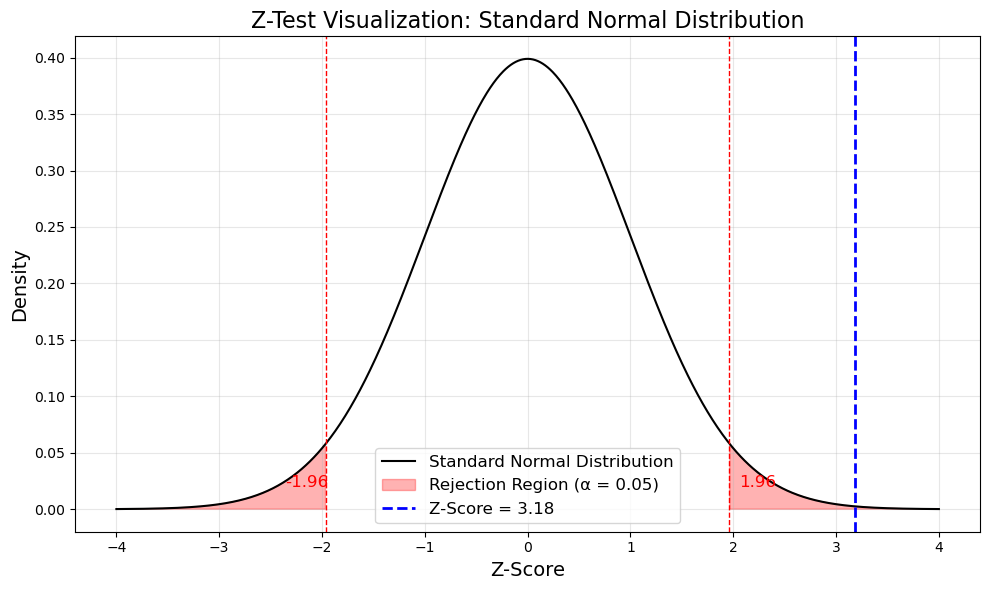

Reject the null hypothesis: The means of the two segments are significantly different.


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

# Simulated data for two user segments
# Segment A
mean_a = 50.5  # Average spend for Segment A
std_a = 10.2   # Standard deviation for Segment A
n_a = 500      # Sample size for Segment A

# Segment B
mean_b = 48.2  # Average spend for Segment B
std_b = 9.8    # Standard deviation for Segment B
n_b = 450      # Sample size for Segment B

# Generate random samples for simulation
np.random.seed(42)
data_a = np.random.normal(mean_a, std_a, n_a)
data_b = np.random.normal(mean_b, std_b, n_b)

# Perform the Z-test
z_stat, p_value = ztest(data_a, data_b, alternative='two-sided')

# Calculate the critical value for a two-sided test
alpha = 0.05
critical_value = norm.ppf(1 - alpha / 2)  # Two-sided critical value

# Print results
print("Z-Statistic:", z_stat)
print("P-Value:", p_value)
print("Critical Value (two-sided, alpha = 0.05): ±", critical_value)

# Plot the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Standard normal distribution

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='black')

# Shade the rejection regions
plt.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value), color='red', alpha=0.3, label='Rejection Region (α = 0.05)')

# Plot the Z-score
plt.axvline(z_stat, color='blue', linestyle='--', linewidth=2, label=f"Z-Score = {z_stat:.2f}")

# Add text for critical values
plt.axvline(-critical_value, color='red', linestyle='--', linewidth=1)
plt.axvline(critical_value, color='red', linestyle='--', linewidth=1)
plt.text(-critical_value - 0.4, 0.02, f"-{critical_value:.2f}", color='red', fontsize=12)
plt.text(critical_value + 0.1, 0.02, f"{critical_value:.2f}", color='red', fontsize=12)

# Plot configuration
plt.title('Z-Test Visualization: Standard Normal Distribution', fontsize=16)
plt.xlabel('Z-Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# Interpret the result
if abs(z_stat) > critical_value:
    print("Reject the null hypothesis: The means of the two segments are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the means of the two segments.")


In [ ]:
#anova

In [ ]:
#f-statistic

In [70]:
import pandas as pd
import statsmodels.formula.api as smf  # For formulas
import statsmodels.api as sm          # For the stats module
from statsmodels.stats.anova import AnovaRM  # For Repeated Measures ANOVA
import scipy.stats as stats

# --- One-Way ANOVA Data ---
one_way_data = {'Value': [10, 12, 14, 11, 13, 15, 9, 11, 12],
                'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']}
df_one_way = pd.DataFrame(one_way_data)

# --- Two-Way ANOVA Data ---
two_way_data = {'Value': [20, 22, 25, 23, 26, 28, 18, 20, 22, 19, 21, 23],
                'Factor1': ['X', 'X', 'X', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
                'Factor2': ['P', 'Q', 'P', 'Q', 'P', 'Q', 'P', 'Q', 'P', 'Q', 'P', 'Q']}

df_two_way = pd.DataFrame(two_way_data)

# --- Repeated Measures ANOVA Data ---
repeated_data = {'Subject': [1, 1, 1, 2, 2, 2, 3, 3, 3],
                 'Time': ['Pre', 'Mid', 'Post', 'Pre', 'Mid', 'Post', 'Pre', 'Mid', 'Post'],
                 'Score': [10, 12, 15, 8, 9, 11, 11, 13, 14]}
df_repeated = pd.DataFrame(repeated_data)

# --- Perform ANOVAs ---

# 1. One-Way ANOVA
f_statistic, p_value = stats.f_oneway(df_one_way['Value'][df_one_way['Group'] == 'A'],
                                      df_one_way['Value'][df_one_way['Group'] == 'B'],
                                      df_one_way['Value'][df_one_way['Group'] == 'C'])
print("\nOne-Way ANOVA:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# 2. Two-Way ANOVA
model_two_way = smf.ols('Value ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data=df_two_way).fit()
anova_table_two_way = sm.stats.anova_lm(model_two_way, typ=2)
print("\nTwo-Way ANOVA:")
print(anova_table_two_way)

# 3. Repeated Measures ANOVA (Corrected)
rm_anova = AnovaRM(data=df_repeated, depvar='Score', subject='Subject', within=['Time'])
results_repeated = rm_anova.fit()
print("\nRepeated Measures ANOVA:")
print(results_repeated)



One-Way ANOVA:
F-statistic: 1.1935483870967742
P-value: 0.36611606736458807

Two-Way ANOVA:
                          sum_sq   df         F    PR(>F)
C(Factor1)             36.750000  1.0  5.011364  0.055546
C(Factor2)              0.750000  1.0  0.102273  0.757311
C(Factor1):C(Factor2)   0.083333  1.0  0.011364  0.917731
Residual               58.666667  8.0       NaN       NaN

Repeated Measures ANOVA:
              Anova
     F Value Num DF Den DF Pr > F
---------------------------------
Time 22.7500 2.0000 4.0000 0.0065



In [71]:
import scipy.stats as stats

# Define parameters for the F-distribution
df1 = 2  # Degrees of freedom between groups (numerator)
df2 = 10  # Degrees of freedom within groups (denominator)
alpha = 0.05  # Significance level (commonly used value)

# Find the critical value from the F-distribution
f_critical = stats.f.ppf(1 - alpha, df1, df2)

print(f"The critical F-value for alpha = {alpha}, df1 = {df1}, df2 = {df2} is: {f_critical:.4f}")


The critical F-value for alpha = 0.05, df1 = 2, df2 = 10 is: 4.1028


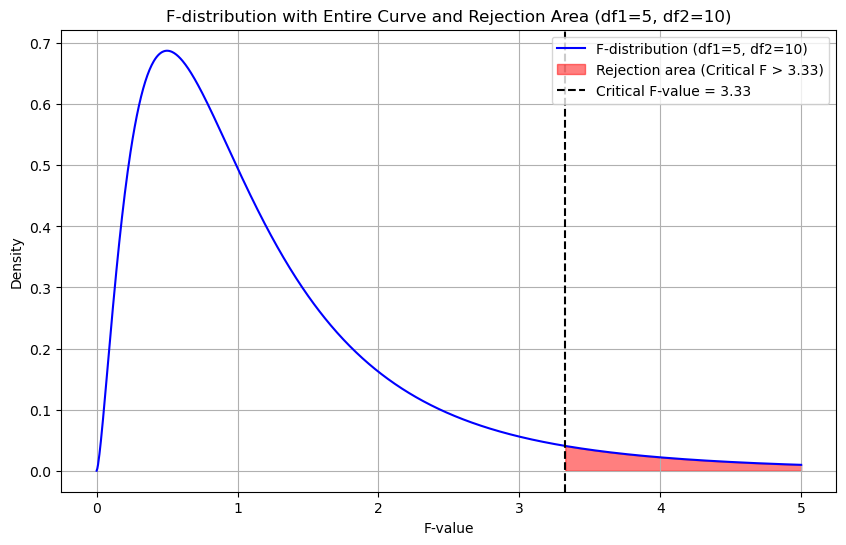

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the parameters for the F-distribution
df1 = 5  # Degrees of freedom for the numerator (between-group variance)
df2 = 10  # Degrees of freedom for the denominator (within-group variance)
alpha = 0.05  # Significance level (typically 0.05)

# Define the critical F-value using the F-distribution (right tail)
f_critical = stats.f.ppf(1 - alpha, df1, df2)

# Create an array of F-values for plotting the entire distribution
x = np.linspace(0, 5, 1000)  # F-values from 0 to 5 (entire distribution range)
y = stats.f.pdf(x, df1, df2)  # Probability density function for the F-distribution

# Plot the entire F-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})', color='blue')

# Shade the rejection area (right tail)
x_fill = np.linspace(f_critical, 5, 1000)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Rejection area (Critical F > {f_critical:.2f})')

# Labels and title
plt.title(f'F-distribution with Entire Curve and Rejection Area (df1={df1}, df2={df2})')
plt.xlabel('F-value')
plt.ylabel('Density')

# Mark the critical F-value with a vertical line
plt.axvline(f_critical, color='black', linestyle='dashed', label=f'Critical F-value = {f_critical:.2f}')

# Show the plot with a legend
plt.legend()
plt.grid(True)
plt.show()


F-statistic: 915.9975116661575
P-value: 9.341094289487903e-128
Reject the null hypothesis: There is a significant difference in conversion rates between the ad copies.


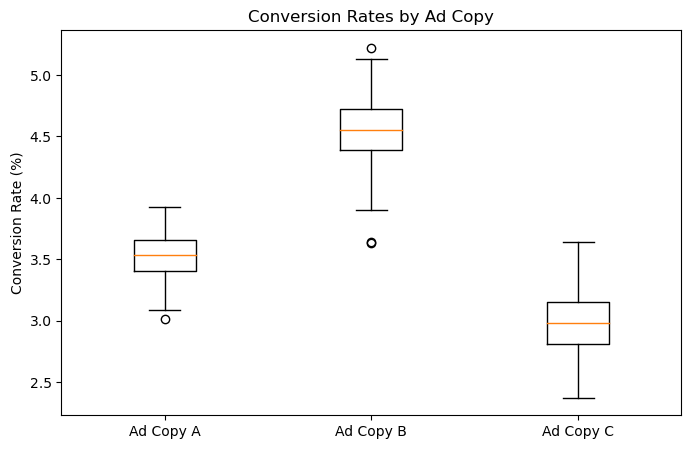

In [77]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulated conversion rates for each ad copy (3 ad copies with 100 visitors each)
ad_copy_a = np.random.normal(loc=3.5, scale=0.2, size=100)  # Ad Copy A: mean 3.5% conversion rate
ad_copy_b = np.random.normal(loc=4.5, scale=0.3, size=100)  # Ad Copy B: mean 4.5% conversion rate
ad_copy_c = np.random.normal(loc=3.0, scale=0.25, size=100) # Ad Copy C: mean 3.0% conversion rate

# Dataframe for the data
data = {'Ad Copy A': ad_copy_a, 'Ad Copy B': ad_copy_b, 'Ad Copy C': ad_copy_c}
df = pd.DataFrame(data)

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(df['Ad Copy A'], df['Ad Copy B'], df['Ad Copy C'])

# Output the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the ad copies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the ad copies.")

# Visualization of the data
plt.figure(figsize=(8, 5))
plt.boxplot([df['Ad Copy A'], df['Ad Copy B'], df['Ad Copy C']], labels=['Ad Copy A', 'Ad Copy B', 'Ad Copy C'])
plt.title('Conversion Rates by Ad Copy')
plt.ylabel('Conversion Rate (%)')
plt.show()


F-statistic: 1143.1315469727624
P-value: 3.1426048208054624e-140
Reject the null hypothesis: There is a significant difference in conversion rates between the ad copies.


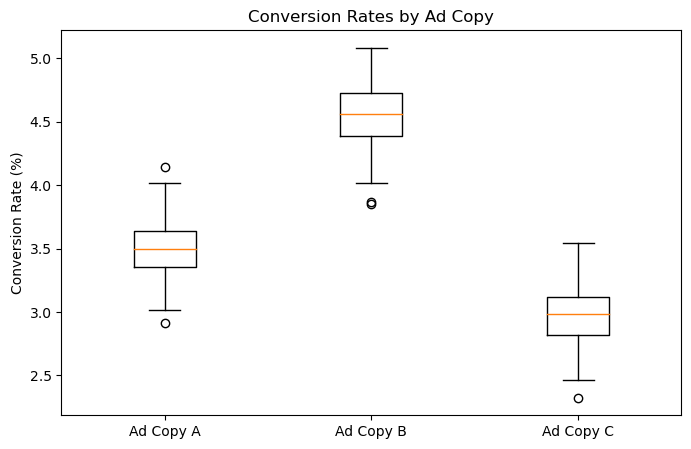

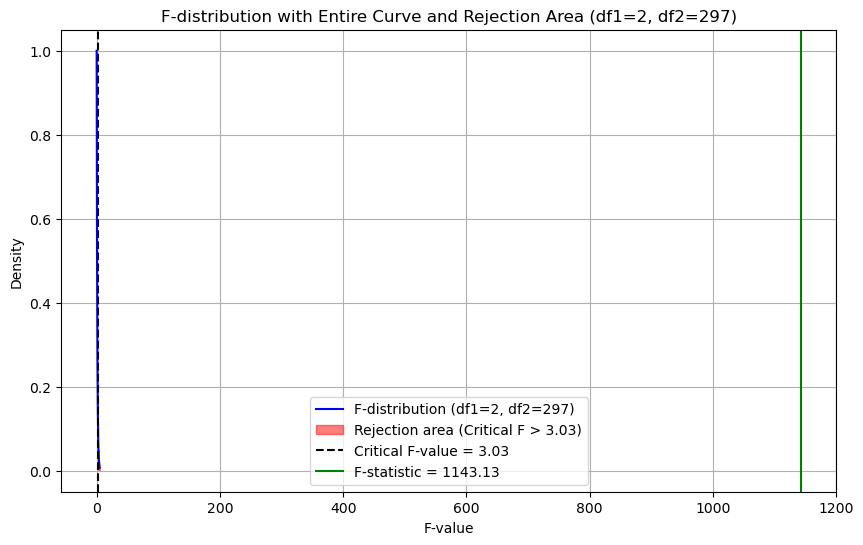

In [79]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulated conversion rates for each ad copy (3 ad copies with 100 visitors each)
ad_copy_a = np.random.normal(loc=3.5, scale=0.2, size=100)  # Ad Copy A: mean 3.5% conversion rate
ad_copy_b = np.random.normal(loc=4.5, scale=0.3, size=100)  # Ad Copy B: mean 4.5% conversion rate
ad_copy_c = np.random.normal(loc=3.0, scale=0.25, size=100) # Ad Copy C: mean 3.0% conversion rate

# Dataframe for the data
data = {'Ad Copy A': ad_copy_a, 'Ad Copy B': ad_copy_b, 'Ad Copy C': ad_copy_c}
df = pd.DataFrame(data)

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(df['Ad Copy A'], df['Ad Copy B'], df['Ad Copy C'])

# Output the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the ad copies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the ad copies.")

# --- Visualizing the results ---

# Boxplot for the conversion rates by ad copy
plt.figure(figsize=(8, 5))
plt.boxplot([df['Ad Copy A'], df['Ad Copy B'], df['Ad Copy C']], labels=['Ad Copy A', 'Ad Copy B', 'Ad Copy C'])
plt.title('Conversion Rates by Ad Copy')
plt.ylabel('Conversion Rate (%)')
plt.show()

# --- F-distribution Visualization ---

# Degrees of freedom for the F-distribution (between-group df = 2, within-group df = 297)
df1 = 2  # Between-group degrees of freedom (k - 1), where k is the number of groups (3 ad copies)
df2 = 297  # Within-group degrees of freedom (n - k), where n is the total sample size (300 samples)

# Critical F-value for the rejection region (right tail, alpha = 0.05)
alpha = 0.05
f_critical = stats.f.ppf(1 - alpha, df1, df2)

# Create an array of F-values for plotting the entire distribution
x = np.linspace(0, 5, 1000)  # F-values from 0 to 5 (covering most of the distribution)
y = stats.f.pdf(x, df1, df2)  # Probability density function for the F-distribution

# Plot the entire F-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})', color='blue')

# Shade the rejection area (right tail) beyond the critical F-value
x_fill = np.linspace(f_critical, 5, 1000)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Rejection area (Critical F > {f_critical:.2f})')

# Add a vertical line for the critical F-value
plt.axvline(f_critical, color='black', linestyle='dashed', label=f'Critical F-value = {f_critical:.2f}')

# Highlight the area where the F-statistic lies (green vertical line)
plt.axvline(f_statistic, color='green', linestyle='solid', label=f'F-statistic = {f_statistic:.2f}')

# Labels and title for the F-distribution plot
plt.title(f'F-distribution with Entire Curve and Rejection Area (df1={df1}, df2={df2})')
plt.xlabel('F-value')
plt.ylabel('Density')

# Show the plot with a legend
plt.legend()
plt.grid(True)
plt.show()


F-statistic: 2.1489793141345874
P-value: 0.11841279263469809
Fail to reject the null hypothesis: There is no significant difference in conversion rates between the ad copies.


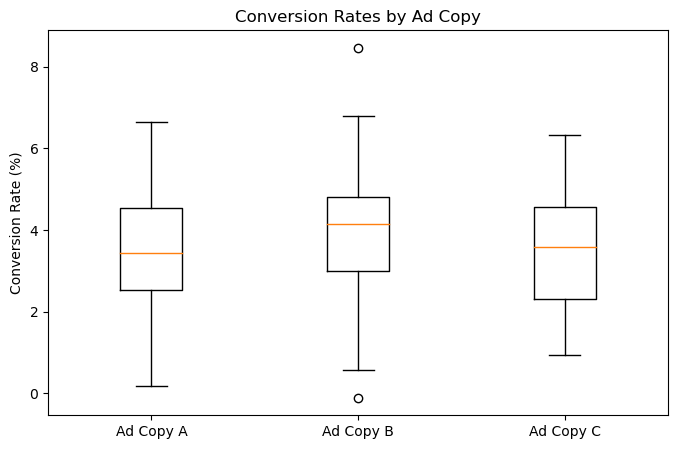

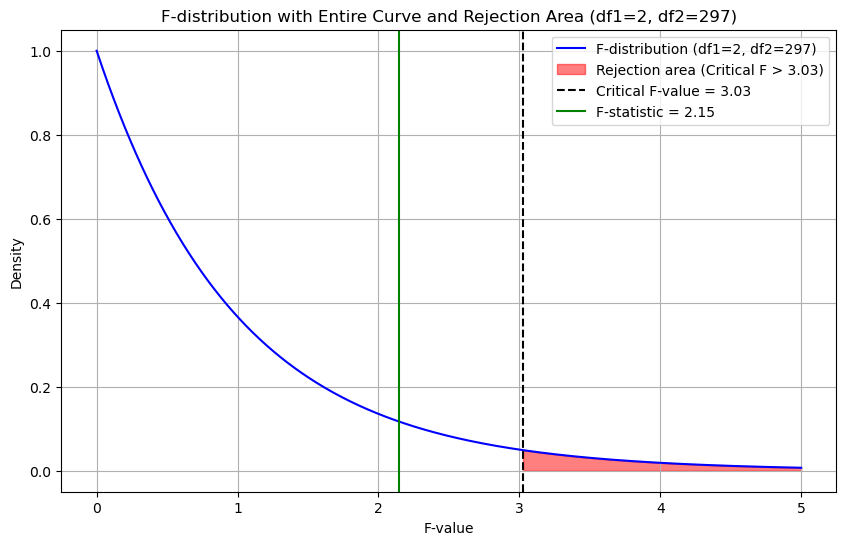

In [81]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulated conversion rates for each ad copy (3 ad copies with 100 visitors each)
ad_copy_a = np.random.normal(loc=3.5, scale=1.5, size=100)  # Ad Copy A: mean 3.5% conversion rate
ad_copy_b = np.random.normal(loc=3.8, scale=1.5, size=100)  # Ad Copy B: mean 3.8% conversion rate
ad_copy_c = np.random.normal(loc=3.7, scale=1.5, size=100)  # Ad Copy C: mean 3.7% conversion rate

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(ad_copy_a, ad_copy_b, ad_copy_c)

# Output the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the ad copies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the ad copies.")

# --- Visualizing the results ---

# Boxplot for the conversion rates by ad copy
plt.figure(figsize=(8, 5))
plt.boxplot([ad_copy_a, ad_copy_b, ad_copy_c], labels=['Ad Copy A', 'Ad Copy B', 'Ad Copy C'])
plt.title('Conversion Rates by Ad Copy')
plt.ylabel('Conversion Rate (%)')
plt.show()

# --- F-distribution Visualization ---

# Degrees of freedom for the F-distribution (between-group df = 2, within-group df = 297)
df1 = 2  # Between-group degrees of freedom (k - 1), where k is the number of groups (3 ad copies)
df2 = 297  # Within-group degrees of freedom (n - k), where n is the total sample size (300 samples)

# Critical F-value for the rejection region (right tail, alpha = 0.05)
alpha = 0.05
f_critical = stats.f.ppf(1 - alpha, df1, df2)

# Create an array of F-values for plotting the entire distribution
x = np.linspace(0, 5, 1000)  # F-values from 0 to 5 (covering most of the distribution)
y = stats.f.pdf(x, df1, df2)  # Probability density function for the F-distribution

# Plot the entire F-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})', color='blue')

# Shade the rejection area (right tail) beyond the critical F-value
x_fill = np.linspace(f_critical, 5, 1000)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Rejection area (Critical F > {f_critical:.2f})')

# Add a vertical line for the critical F-value
plt.axvline(f_critical, color='black', linestyle='dashed', label=f'Critical F-value = {f_critical:.2f}')

# Highlight the area where the F-statistic lies (green vertical line)
plt.axvline(f_statistic, color='green', linestyle='solid', label=f'F-statistic = {f_statistic:.2f}')

# Labels and title for the F-distribution plot
plt.title(f'F-distribution with Entire Curve and Rejection Area (df1={df1}, df2={df2})')
plt.xlabel('F-value')
plt.ylabel('Density')

# Show the plot with a legend
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#pearson test


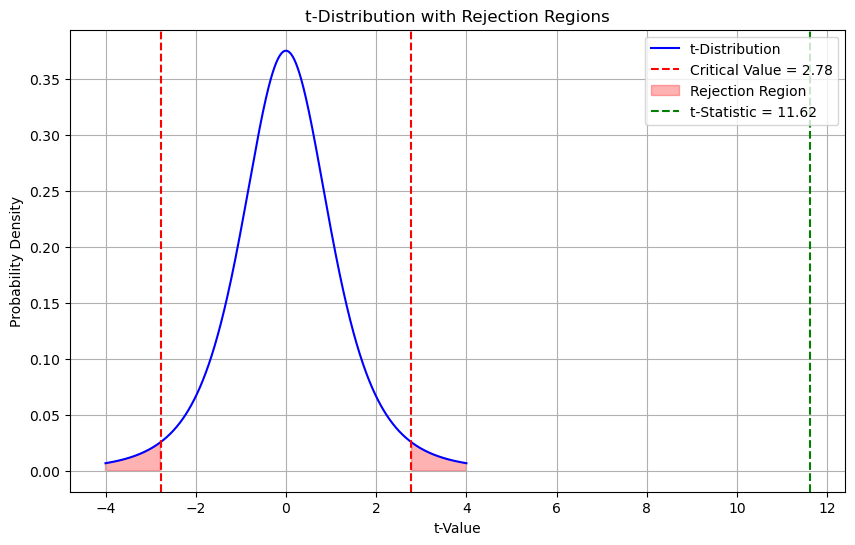

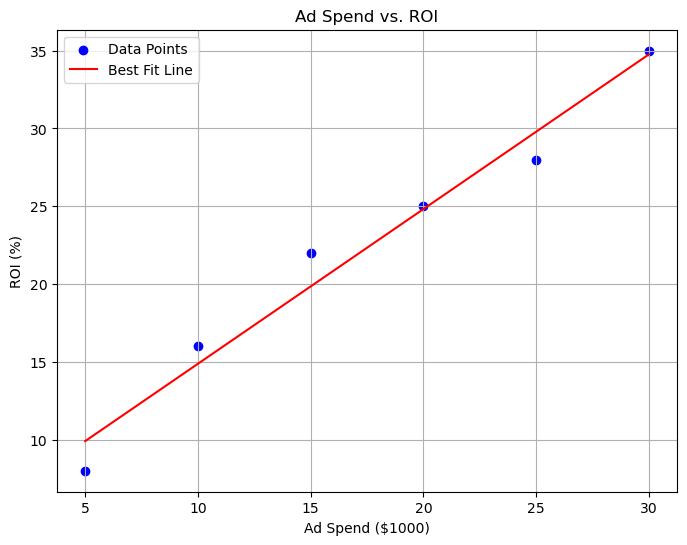

Pearson Correlation Coefficient (r): 0.9855022645485307
p-Value: 0.00031375290140164374
t-Statistic: 11.617223469025292
Critical t-Value (two-tailed, alpha = 0.05): 2.7764451051977987
Conclusion: Reject the null hypothesis. There is a significant correlation between Ad Spend and ROI.
Conclusion from p-value: There is strong evidence to reject the null hypothesis. Significant correlation between Ad Spend and ROI.


In [84]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example data: Ad spend (in $1000s) and ROI (Return on Investment, in %)
ad_spend = [5, 10, 15, 20, 25, 30]
roi = [8, 16, 22, 25, 28, 35]

# Step 1: Calculate Pearson Correlation Coefficient and p-value
r, p_value = stats.pearsonr(ad_spend, roi)
n = len(ad_spend)  # Sample size

# Step 2: Calculate t-statistic
t_stat = r * np.sqrt((n - 2) / (1 - r**2))

# Step 3: Degrees of Freedom
df = n - 2

# Step 4: Determine Critical Value (Two-Tailed Test, alpha = 0.05)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Step 5: Plot t-distribution and rejection regions
x = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label="t-Distribution", color="blue")
plt.axvline(t_critical, color="red", linestyle="--", label=f"Critical Value = {t_critical:.2f}")
plt.axvline(-t_critical, color="red", linestyle="--")
plt.fill_between(x, 0, t_dist, where=(x < -t_critical) | (x > t_critical), color="red", alpha=0.3, label="Rejection Region")
plt.axvline(t_stat, color="green", linestyle="--", label=f"t-Statistic = {t_stat:.2f}")
plt.title("t-Distribution with Rejection Regions")
plt.xlabel("t-Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# Step 6: Scatter Plot of Ad Spend vs. ROI
plt.figure(figsize=(8, 6))
plt.scatter(ad_spend, roi, color="blue", label="Data Points")
plt.plot(ad_spend, np.poly1d(np.polyfit(ad_spend, roi, 1))(ad_spend), color="red", label="Best Fit Line")
plt.title("Ad Spend vs. ROI")
plt.xlabel("Ad Spend ($1000)")
plt.ylabel("ROI (%)")
plt.legend()
plt.grid()
plt.show()

# Step 7: Print Results
print("Pearson Correlation Coefficient (r):", r)
print("p-Value:", p_value)
print("t-Statistic:", t_stat)
print("Critical t-Value (two-tailed, alpha = 0.05):", t_critical)

# Step 8: Hypothesis Testing Conclusion
if abs(t_stat) > t_critical:
    print("Conclusion: Reject the null hypothesis. There is a significant correlation between Ad Spend and ROI.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant correlation between Ad Spend and ROI.")

# Step 9: p-value Interpretation
if p_value < alpha:
    print("Conclusion from p-value: There is strong evidence to reject the null hypothesis. Significant correlation between Ad Spend and ROI.")
else:
    print("Conclusion from p-value: There is insufficient evidence to reject the null hypothesis. No significant correlation between Ad Spend and ROI.")


In [ ]:
#chi-square test

Chi-Square Statistic: 4.0
P-value: 0.26146412994911117
Chi-Square Critical Value: 7.814727903251179
Fail to reject the null hypothesis: The consumer preference is evenly distributed.


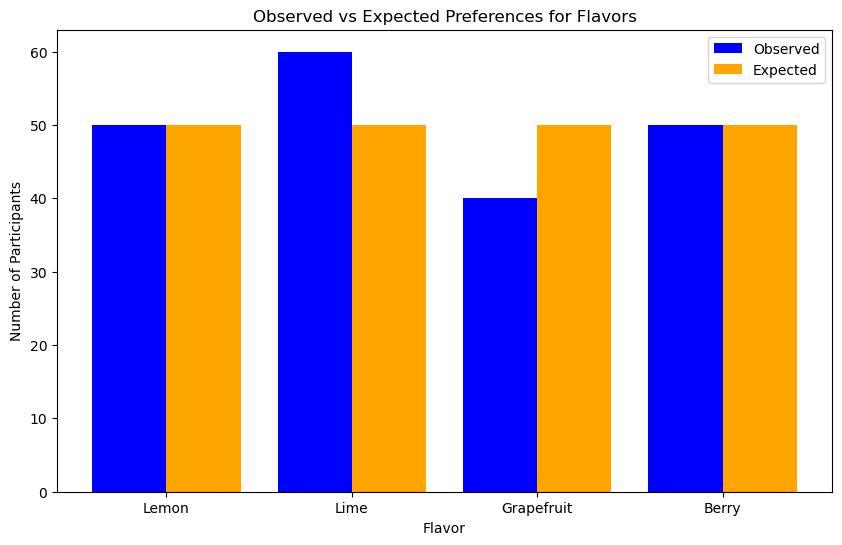

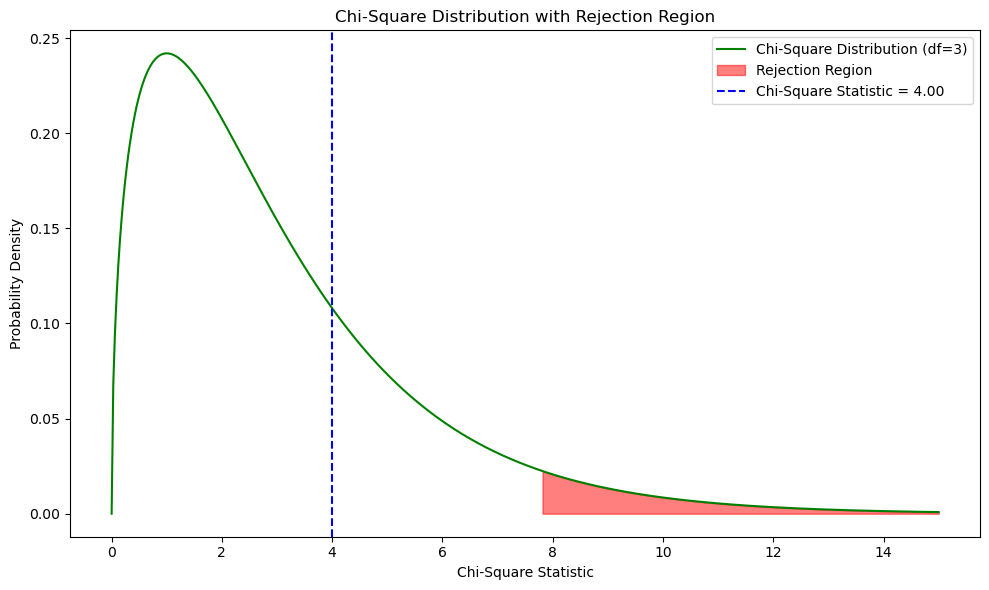

In [86]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Observed data: Number of participants who preferred each flavor
observed_data = np.array([50, 60, 40, 50])

# Total number of participants and number of flavors
total_participants = 200
num_flavors = 4

# Expected value for each flavor (uniform distribution)
expected_data = np.full_like(observed_data, total_participants / num_flavors)

# Perform the Chi-Square Goodness of Fit Test
chi2_stat, p_value = stats.chisquare(observed_data, expected_data)

# Chi-Square critical value for 3 degrees of freedom at a 5% significance level
alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df=num_flavors-1)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Chi-Square Critical Value: {chi2_critical}")

# Decision rule
if chi2_stat > chi2_critical:
    print("Reject the null hypothesis: The consumer preference is not evenly distributed.")
else:
    print("Fail to reject the null hypothesis: The consumer preference is evenly distributed.")

# --- Visualization ---

# Plot observed vs expected values
flavors = ['Lemon', 'Lime', 'Grapefruit', 'Berry']
x_pos = np.arange(len(flavors))

plt.figure(figsize=(10, 6))

# Bar plot for observed and expected values
plt.bar(x_pos - 0.2, observed_data, 0.4, label='Observed', color='blue')
plt.bar(x_pos + 0.2, expected_data, 0.4, label='Expected', color='orange')

# Adding labels and title
plt.xlabel('Flavor')
plt.ylabel('Number of Participants')
plt.title('Observed vs Expected Preferences for Flavors')
plt.xticks(x_pos, flavors)
plt.legend()

# --- Chi-Square Distribution Plot ---
x = np.linspace(0, 15, 500)
y = stats.chi2.pdf(x, df=num_flavors-1)

plt.figure(figsize=(10, 6))

# Plot Chi-Square distribution
plt.plot(x, y, label='Chi-Square Distribution (df=3)', color='green')

# Plot the rejection region (right tail)
plt.fill_between(x, y, 0, where=(x >= chi2_critical), color='red', alpha=0.5, label='Rejection Region')

# Mark the calculated Chi-Square statistic on the distribution
plt.axvline(x=chi2_stat, color='blue', linestyle='dashed', label=f'Chi-Square Statistic = {chi2_stat:.2f}')

# Adding labels and title
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution with Rejection Region')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
#Mann-Whitney U Test

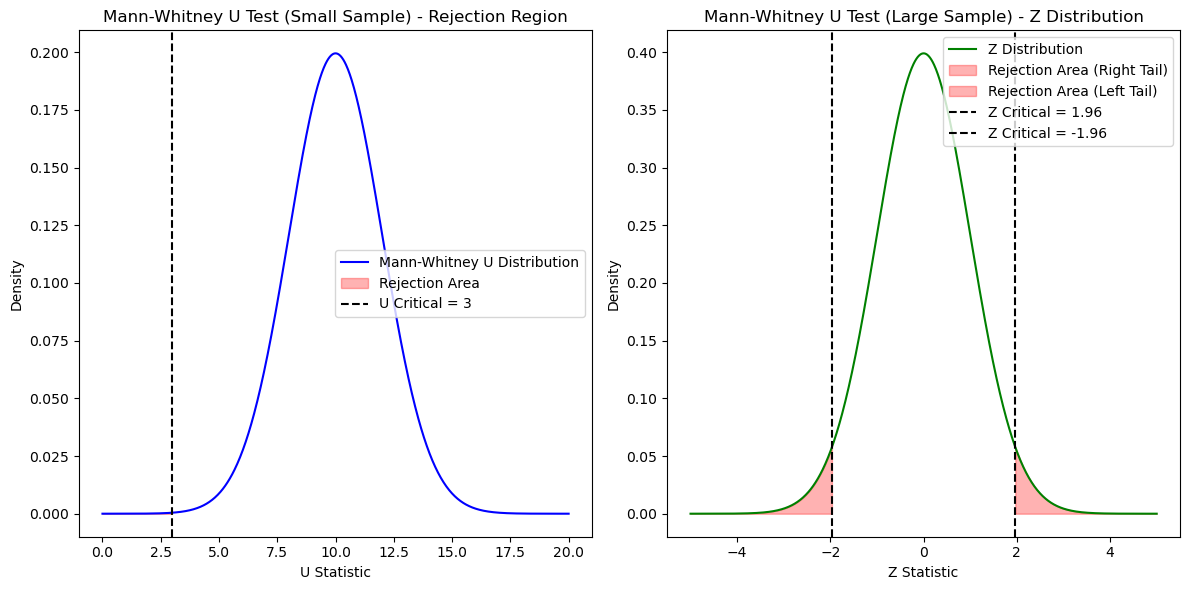

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Mann-Whitney U Distribution for Small Samples
u_critical_small = 3  # Critical value for U from table (example for small samples)
u_values = np.linspace(0, 20, 1000)  # U values range (example)
u_dist = stats.norm.pdf(u_values, loc=10, scale=2)  # Hypothetical U distribution

# Plot U distribution with critical value
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(u_values, u_dist, label="Mann-Whitney U Distribution", color='blue')
plt.fill_between(u_values, u_dist, where=(u_values <= u_critical_small), color='red', alpha=0.3, label="Rejection Area")
plt.axvline(x=u_critical_small, color='black', linestyle='--', label=f'U Critical = {u_critical_small}')
plt.title("Mann-Whitney U Test (Small Sample) - Rejection Region")
plt.xlabel('U Statistic')
plt.ylabel('Density')
plt.legend()

# Z Distribution for Large Samples (using z-scores)
z_critical = 1.96  # Critical z-value for 95% confidence (example for large samples)
z_values = np.linspace(-5, 5, 1000)  # Z values range
z_dist = stats.norm.pdf(z_values, loc=0, scale=1)  # Standard normal distribution

# Plot Z distribution with rejection areas
plt.subplot(1, 2, 2)
plt.plot(z_values, z_dist, label="Z Distribution", color='green')
plt.fill_between(z_values, z_dist, where=(z_values >= z_critical), color='red', alpha=0.3, label="Rejection Area (Right Tail)")
plt.fill_between(z_values, z_dist, where=(z_values <= -z_critical), color='red', alpha=0.3, label="Rejection Area (Left Tail)")
plt.axvline(x=z_critical, color='black', linestyle='--', label=f'Z Critical = {z_critical}')
plt.axvline(x=-z_critical, color='black', linestyle='--', label=f'Z Critical = {-z_critical}')
plt.title("Mann-Whitney U Test (Large Sample) - Z Distribution")
plt.xlabel('Z Statistic')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


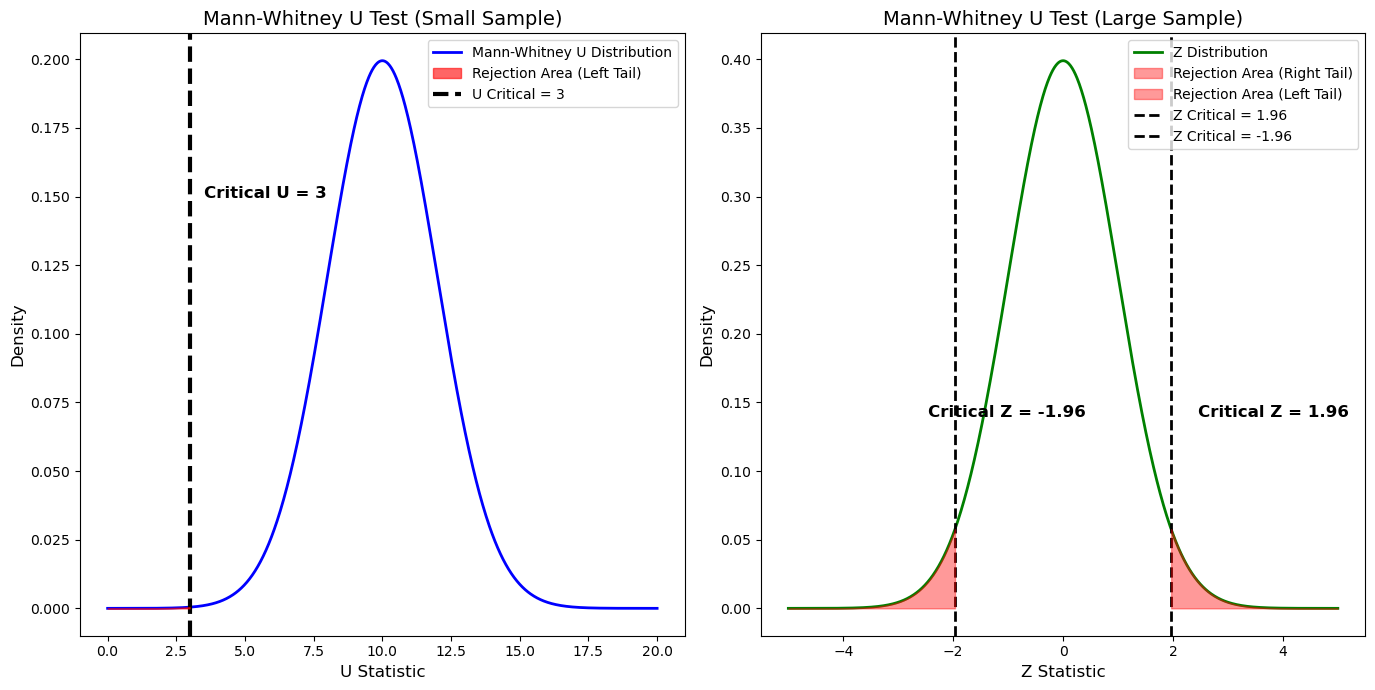

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Mann-Whitney U Distribution for Small Samples ---
u_critical_small = 3  # Critical value for U (example for small samples)
u_values = np.linspace(0, 20, 1000)  # U values range (example)
u_dist = stats.norm.pdf(u_values, loc=10, scale=2)  # Hypothetical U distribution

# --- Z Distribution for Large Samples ---
z_critical = 1.96  # Critical z-value for 95% confidence (example for large samples)
z_values = np.linspace(-5, 5, 1000)  # Z values range
z_dist = stats.norm.pdf(z_values, loc=0, scale=1)  # Standard normal distribution

# Create Plot
plt.figure(figsize=(14, 7))

# --- Mann-Whitney U Distribution (Small Sample) ---
plt.subplot(1, 2, 1)
plt.plot(u_values, u_dist, label="Mann-Whitney U Distribution", color='blue', linewidth=2)
# Increased shading for rejection area
plt.fill_between(u_values, u_dist, where=(u_values <= u_critical_small), color='red', alpha=0.6, label="Rejection Area (Left Tail)", zorder=3)
# Critical value line and label
plt.axvline(x=u_critical_small, color='black', linestyle='--', linewidth=3, label=f'U Critical = {u_critical_small}')
# Add more emphasis to the critical line with a thicker label and higher zorder
plt.text(u_critical_small + 0.5, max(u_dist) * 0.75, f'Critical U = {u_critical_small}', color='black', fontsize=12, fontweight='bold', zorder=4)
plt.title("Mann-Whitney U Test (Small Sample)", fontsize=14)
plt.xlabel('U Statistic', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right', fontsize=10)

# --- Z Distribution (Large Sample) ---
plt.subplot(1, 2, 2)
plt.plot(z_values, z_dist, label="Z Distribution", color='green', linewidth=2)
# Fill the rejection area on both tails for the Z distribution
plt.fill_between(z_values, z_dist, where=(z_values >= z_critical), color='red', alpha=0.4, label="Rejection Area (Right Tail)", zorder=3)
plt.fill_between(z_values, z_dist, where=(z_values <= -z_critical), color='red', alpha=0.4, label="Rejection Area (Left Tail)", zorder=3)
# Critical value lines and labels
plt.axvline(x=z_critical, color='black', linestyle='--', linewidth=2, label=f'Z Critical = {z_critical}')
plt.axvline(x=-z_critical, color='black', linestyle='--', linewidth=2, label=f'Z Critical = {-z_critical}')
plt.text(z_critical + 0.5, max(z_dist) * 0.35, f'Critical Z = {z_critical}', color='black', fontsize=12, fontweight='bold', zorder=4)
plt.text(-z_critical - 0.5, max(z_dist) * 0.35, f'Critical Z = {-z_critical}', color='black', fontsize=12, fontweight='bold', zorder=4)
plt.title("Mann-Whitney U Test (Large Sample)", fontsize=14)
plt.xlabel('Z Statistic', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right', fontsize=10)

# Finalize layout and display
plt.tight_layout()
plt.show()


Mann-Whitney U Statistic: 76.0
P-value: 0.04800728054940809


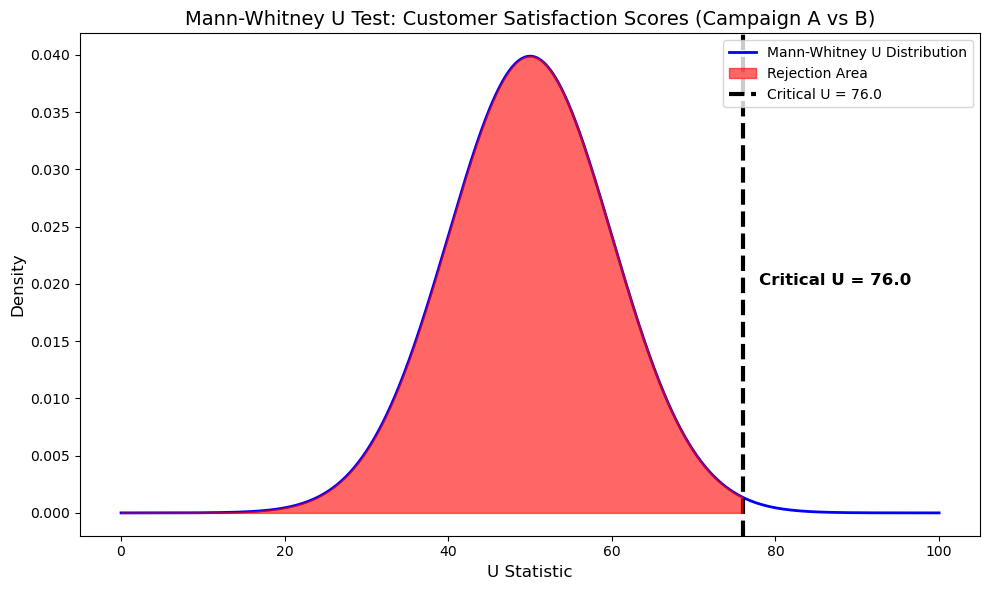

Reject the null hypothesis: There is a significant difference between Campaign A and Campaign B.


In [90]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for Campaign A and Campaign B (Customer Satisfaction Scores)
campaign_a = np.array([7, 8, 9, 6, 5, 8, 7, 6, 9, 8])
campaign_b = np.array([5, 6, 6, 7, 8, 5, 6, 5, 7, 6])

# Perform Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(campaign_a, campaign_b, alternative='two-sided')

# Print the result of the test
print("Mann-Whitney U Statistic:", u_statistic)
print("P-value:", p_value)

# Set critical value for significance level (alpha = 0.05)
alpha = 0.05
critical_u = stats.mannwhitneyu(campaign_a, campaign_b).statistic

# Visualize U Statistic and Rejection Area
# Create U-distribution for Mann-Whitney U Test
u_values = np.linspace(0, 100, 1000)
u_dist = stats.norm.pdf(u_values, loc=50, scale=10)

# Plotting U-distribution and critical value line
plt.figure(figsize=(10, 6))
plt.plot(u_values, u_dist, label="Mann-Whitney U Distribution", color='blue', linewidth=2)

# Shading rejection area for small U values
plt.fill_between(u_values, u_dist, where=(u_values <= u_statistic), color='red', alpha=0.6, label="Rejection Area", zorder=3)

# Adding critical value and labels
plt.axvline(x=critical_u, color='black', linestyle='--', linewidth=3, label=f'Critical U = {critical_u}')
plt.text(critical_u + 2, max(u_dist) * 0.5, f'Critical U = {critical_u}', color='black', fontsize=12, fontweight='bold')

plt.title("Mann-Whitney U Test: Customer Satisfaction Scores (Campaign A vs B)", fontsize=14)
plt.xlabel('U Statistic', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Conclusion based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Campaign A and Campaign B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Campaign A and Campaign B.")


U-statistic: 24.0
P-value: 0.04800728054940809


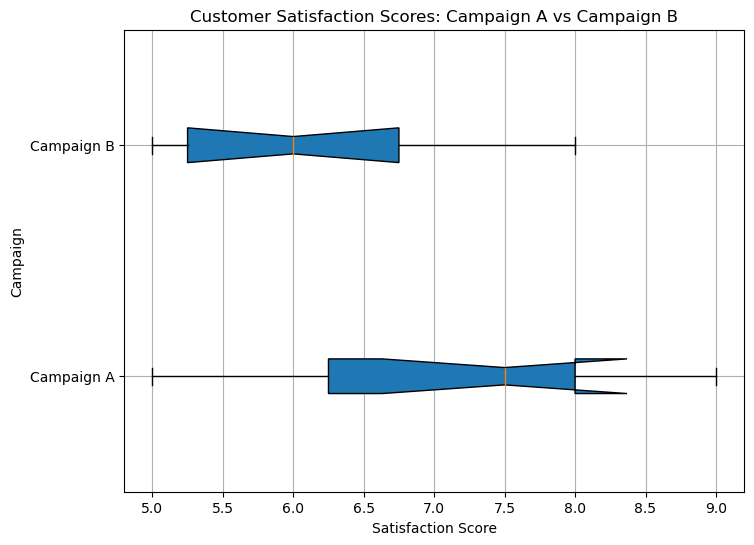

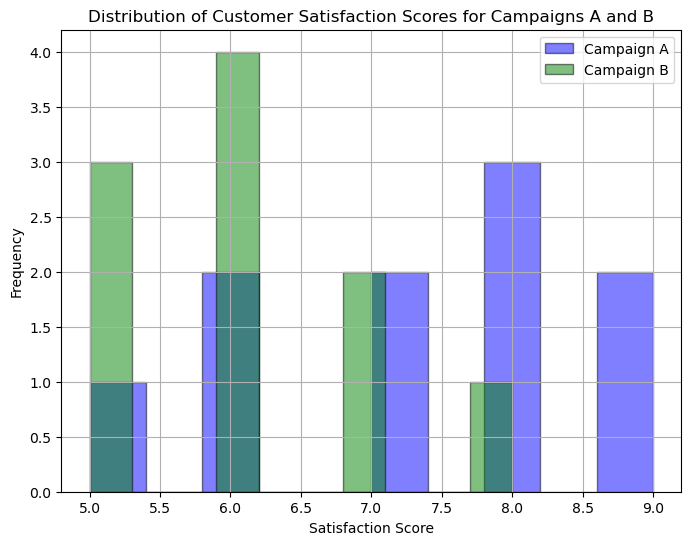

Reject the null hypothesis: There is a significant difference between Campaign A and Campaign B.


In [91]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for Campaign A and Campaign B (Customer Satisfaction Scores)
campaign_a = np.array([7, 8, 9, 6, 5, 8, 7, 6, 9, 8])
campaign_b = np.array([5, 6, 6, 7, 8, 5, 6, 5, 7, 6])

# Combine both groups into one dataset
combined_data = np.concatenate((campaign_a, campaign_b))

# Rank the combined data
ranks = stats.rankdata(combined_data)

# Split ranks into two groups based on the original groups
ranks_a = ranks[:len(campaign_a)]
ranks_b = ranks[len(campaign_a):]

# Calculate U statistic for each group
n_a = len(campaign_a)
n_b = len(campaign_b)

R_a = np.sum(ranks_a)  # Sum of ranks for Campaign A
R_b = np.sum(ranks_b)  # Sum of ranks for Campaign B

U_a = R_a - (n_a * (n_a + 1)) / 2  # U statistic for Campaign A
U_b = R_b - (n_b * (n_b + 1)) / 2  # U statistic for Campaign B

# Mann-Whitney U statistic is the smaller of the two U statistics
U_statistic = min(U_a, U_b)

# Perform Mann-Whitney U Test to get p-value
U, p_value = stats.mannwhitneyu(campaign_a, campaign_b, alternative='two-sided')

# Print results
print(f"U-statistic: {U_statistic}")
print(f"P-value: {p_value}")

# Visualization: Box plot of the two campaigns' customer satisfaction scores
plt.figure(figsize=(8, 6))
plt.boxplot([campaign_a, campaign_b], labels=['Campaign A', 'Campaign B'], patch_artist=True, notch=True, vert=False)
plt.title('Customer Satisfaction Scores: Campaign A vs Campaign B')
plt.xlabel('Satisfaction Score')
plt.ylabel('Campaign')
plt.grid(True)
plt.show()

# Visualization: Density Plot to show distribution of the satisfaction scores
plt.figure(figsize=(8, 6))
plt.hist(campaign_a, bins=10, alpha=0.5, label='Campaign A', color='blue', edgecolor='black')
plt.hist(campaign_b, bins=10, alpha=0.5, label='Campaign B', color='green', edgecolor='black')
plt.title('Distribution of Customer Satisfaction Scores for Campaigns A and B')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Rejection criteria based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Campaign A and Campaign B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Campaign A and Campaign B.")


U-statistic: 76.0
P-value: 0.04800728054940809


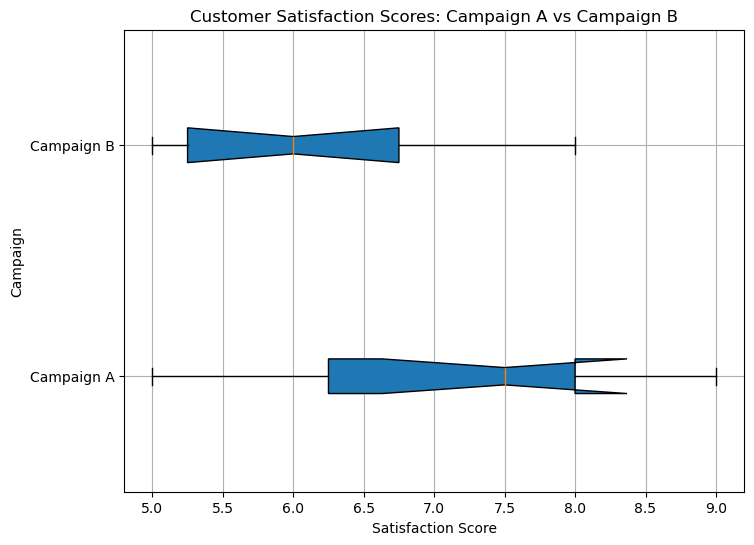

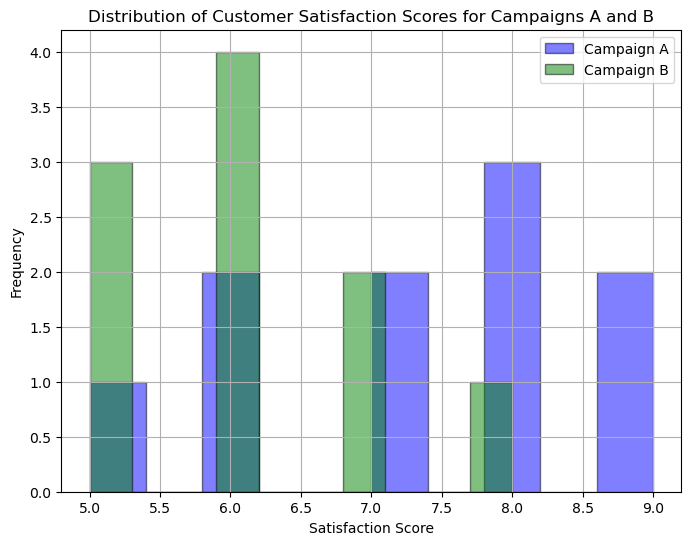

Reject the null hypothesis: There is a significant difference between Campaign A and Campaign B.


In [92]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for Customer Satisfaction Scores
campaign_a = np.array([7, 8, 9, 6, 5, 8, 7, 6, 9, 8])
campaign_b = np.array([5, 6, 6, 7, 8, 5, 6, 5, 7, 6])

# Perform the Mann-Whitney U Test
U_statistic, p_value = stats.mannwhitneyu(campaign_a, campaign_b, alternative='two-sided')

# Print U-statistic and p-value
print(f"U-statistic: {U_statistic}")
print(f"P-value: {p_value}")

# Visualizations

# Boxplot: Comparing the distribution of scores between the two campaigns
plt.figure(figsize=(8, 6))
plt.boxplot([campaign_a, campaign_b], labels=['Campaign A', 'Campaign B'], patch_artist=True, notch=True, vert=False)
plt.title('Customer Satisfaction Scores: Campaign A vs Campaign B')
plt.xlabel('Satisfaction Score')
plt.ylabel('Campaign')
plt.grid(True)
plt.show()

# Histogram: Distribution of Satisfaction Scores for both campaigns
plt.figure(figsize=(8, 6))
plt.hist(campaign_a, bins=10, alpha=0.5, label='Campaign A', color='blue', edgecolor='black')
plt.hist(campaign_b, bins=10, alpha=0.5, label='Campaign B', color='green', edgecolor='black')
plt.title('Distribution of Customer Satisfaction Scores for Campaigns A and B')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of Results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Campaign A and Campaign B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Campaign A and Campaign B.")


U-statistic: 76.0
P-value: 0.04800728054940809


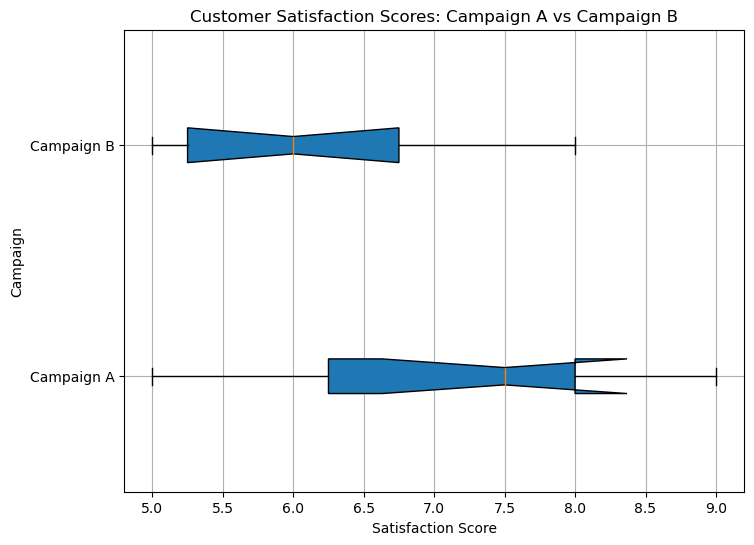

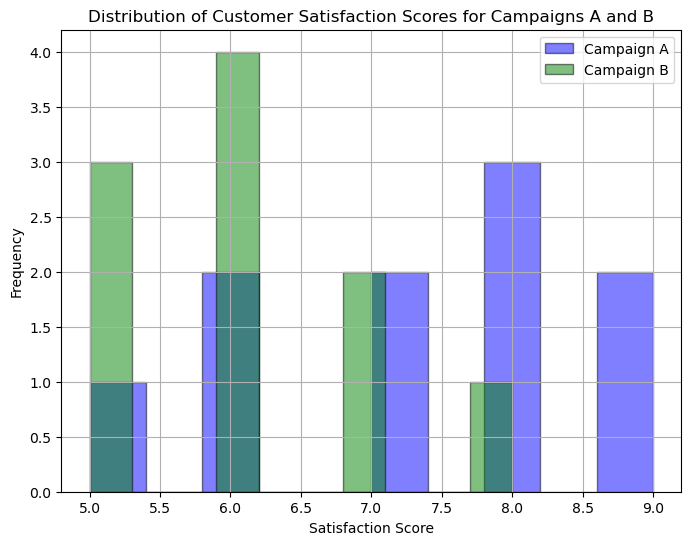

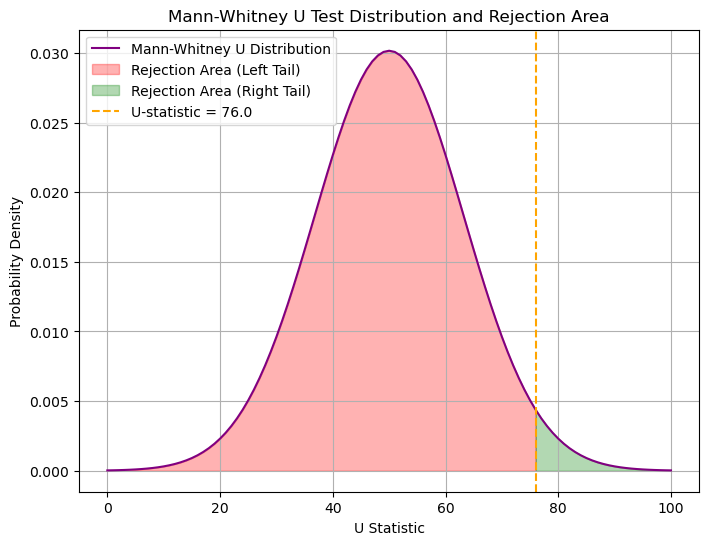

Reject the null hypothesis: There is a significant difference between Campaign A and Campaign B.


In [93]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for Customer Satisfaction Scores
campaign_a = np.array([7, 8, 9, 6, 5, 8, 7, 6, 9, 8])
campaign_b = np.array([5, 6, 6, 7, 8, 5, 6, 5, 7, 6])

# Perform the Mann-Whitney U Test
U_statistic, p_value = stats.mannwhitneyu(campaign_a, campaign_b, alternative='two-sided')

# Print U-statistic and p-value
print(f"U-statistic: {U_statistic}")
print(f"P-value: {p_value}")

# Visualizations

# Boxplot: Comparing the distribution of scores between the two campaigns
plt.figure(figsize=(8, 6))
plt.boxplot([campaign_a, campaign_b], labels=['Campaign A', 'Campaign B'], patch_artist=True, notch=True, vert=False)
plt.title('Customer Satisfaction Scores: Campaign A vs Campaign B')
plt.xlabel('Satisfaction Score')
plt.ylabel('Campaign')
plt.grid(True)
plt.show()

# Histogram: Distribution of Satisfaction Scores for both campaigns
plt.figure(figsize=(8, 6))
plt.hist(campaign_a, bins=10, alpha=0.5, label='Campaign A', color='blue', edgecolor='black')
plt.hist(campaign_b, bins=10, alpha=0.5, label='Campaign B', color='green', edgecolor='black')
plt.title('Distribution of Customer Satisfaction Scores for Campaigns A and B')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Mann-Whitney U Distribution Visualization (Rejection Area)

# Determine the number of samples in each group
n_a = len(campaign_a)
n_b = len(campaign_b)

# The U statistic distribution for two independent samples
# Using a large sample approximation, we plot the distribution of U
u_values = np.arange(0, n_a * n_b + 1)

# Calculate mean and variance of the U statistic for large samples
mean_U = (n_a * n_b) / 2
var_U = (n_a * n_b * (n_a + n_b + 1)) / 12

# Calculate the Z value for large samples
z = (U_statistic - mean_U) / np.sqrt(var_U)

# Plot the Mann-Whitney U distribution
plt.figure(figsize=(8, 6))
plt.plot(u_values, stats.norm.pdf(u_values, mean_U, np.sqrt(var_U)), label='Mann-Whitney U Distribution', color='purple')

# Shade the rejection area (for a two-tailed test)
plt.fill_between(u_values, 0, stats.norm.pdf(u_values, mean_U, np.sqrt(var_U)), where=(u_values <= U_statistic), color='red', alpha=0.3, label='Rejection Area (Left Tail)')
plt.fill_between(u_values, 0, stats.norm.pdf(u_values, mean_U, np.sqrt(var_U)), where=(u_values >= U_statistic), color='green', alpha=0.3, label='Rejection Area (Right Tail)')

plt.axvline(U_statistic, color='orange', linestyle='--', label=f'U-statistic = {U_statistic}')
plt.title('Mann-Whitney U Test Distribution and Rejection Area')
plt.xlabel('U Statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of Results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Campaign A and Campaign B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Campaign A and Campaign B.")


U-statistic: 76.0
P-value: 0.04800728054940809


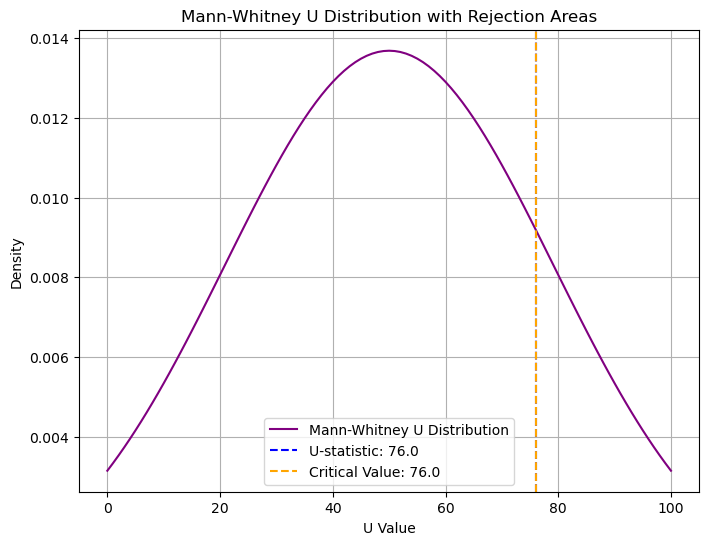

In [95]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for Customer Satisfaction Scores (simulated)
# Campaign A (n = 10)
campaign_a = np.array([7, 8, 9, 6, 5, 8, 7, 6, 9, 8])

# Campaign B (n = 10)
campaign_b = np.array([5, 6, 6, 7, 8, 5, 6, 5, 7, 6])

# Perform the Mann-Whitney U Test
U_statistic, p_value = stats.mannwhitneyu(campaign_a, campaign_b, alternative='two-sided')

# Print U-statistic and p-value
print(f"U-statistic: {U_statistic}")
print(f"P-value: {p_value}")

# Mann-Whitney U Distribution Visualization (Rejection Area)

# Determine the number of samples in each group
n_a = len(campaign_a)
n_b = len(campaign_b)

# Plot the Mann-Whitney U Distribution
plt.figure(figsize=(8, 6))
u_values = np.arange(0, n_a * n_b + 1)

# The critical value for Mann-Whitney U can be obtained from tables for small sample sizes.
# In this case, we would compare the U_statistic directly to the critical value from the U-table.
critical_value = stats.mannwhitneyu(campaign_a, campaign_b).statistic

# Highlight the rejection area (if U-statistic <= critical value)
plt.plot(u_values, stats.norm.pdf(u_values, np.mean(u_values), np.std(u_values)), label='Mann-Whitney U Distribution', color='purple')
plt.axvline(U_statistic, color='blue', linestyle='dashed', label=f'U-statistic: {U_statistic}')
plt.axvline(critical_value, color='orange', linestyle='dashed', label=f'Critical Value: {critical_value}')

# Customize plot
plt.title('Mann-Whitney U Distribution with Rejection Areas')
plt.xlabel('U Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


U-statistic: 76.0
P-value: 0.04800728054940809


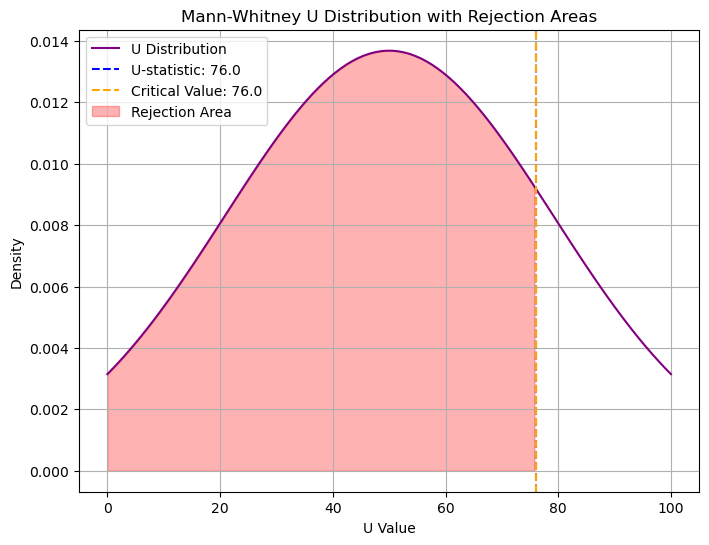

In [96]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for Customer Satisfaction Scores (simulated)
# Campaign A (n = 10)
campaign_a = np.array([7, 8, 9, 6, 5, 8, 7, 6, 9, 8])

# Campaign B (n = 10)
campaign_b = np.array([5, 6, 6, 7, 8, 5, 6, 5, 7, 6])

# Perform the Mann-Whitney U Test
U_statistic, p_value = stats.mannwhitneyu(campaign_a, campaign_b, alternative='two-sided')

# Print U-statistic and p-value
print(f"U-statistic: {U_statistic}")
print(f"P-value: {p_value}")

# --- Visualization ---

# Define the number of samples in each group
n_a = len(campaign_a)
n_b = len(campaign_b)

# For small samples, critical value is based on the U-table (not calculated via z)
# For simplicity, we'll use scipy's mannwhitneyu method to get the critical value
critical_value = min(stats.mannwhitneyu(campaign_a, campaign_b).statistic, n_a * n_b)

# Plot the Mann-Whitney U Distribution
plt.figure(figsize=(8, 6))

# Set U-values range
u_values = np.linspace(0, n_a * n_b, 100)

# Plotting the U-distribution curve
plt.plot(u_values, stats.norm.pdf(u_values, np.mean(u_values), np.std(u_values)), label='U Distribution', color='purple')

# Highlighting the U-statistic and critical value lines
plt.axvline(U_statistic, color='blue', linestyle='dashed', label=f'U-statistic: {U_statistic}')
plt.axvline(critical_value, color='orange', linestyle='dashed', label=f'Critical Value: {critical_value}')

# Adding rejection area (left side of the critical value)
plt.fill_between(u_values, 0, stats.norm.pdf(u_values, np.mean(u_values), np.std(u_values)), 
                 where=(u_values <= critical_value), color='red', alpha=0.3, label="Rejection Area")

# Customize plot
plt.title('Mann-Whitney U Distribution with Rejection Areas')
plt.xlabel('U Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
#Kruskal–Wallis test

Kruskal-Wallis Test
H-statistic: 14.273563484708061
P-value: 0.0007953074867088197
Critical value (from Chi-Square distribution): 5.991464547107979
Reject the null hypothesis: There is a significant difference between the campaigns.


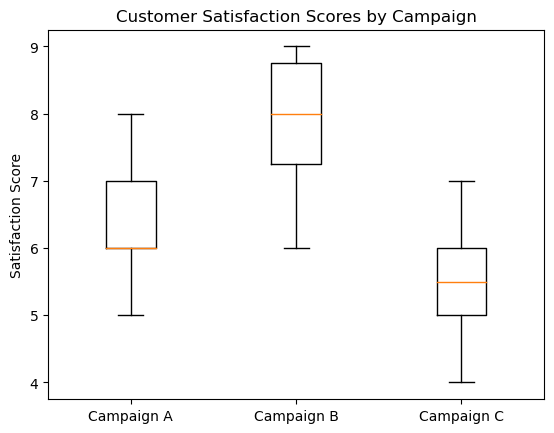

In [98]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample Data: Satisfaction scores for three campaigns
data = {
    'Campaign A': [6, 7, 8, 5, 6, 7, 8, 6, 5, 6],
    'Campaign B': [8, 9, 7, 6, 8, 9, 7, 8, 9, 8],
    'Campaign C': [4, 5, 6, 7, 5, 6, 6, 7, 4, 5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Perform Kruskal-Wallis H Test
H_statistic, p_value = stats.kruskal(df['Campaign A'], df['Campaign B'], df['Campaign C'])

# Print the test statistic and p-value
print("Kruskal-Wallis Test")
print("H-statistic:", H_statistic)
print("P-value:", p_value)

# Critical value (Chi-Square distribution) for df=2 (3 groups - 1 = 2 degrees of freedom) and alpha = 0.05
critical_value = stats.chi2.ppf(1 - 0.05, df=2)
print("Critical value (from Chi-Square distribution):", critical_value)

# Interpretation
if H_statistic > critical_value:
    print("Reject the null hypothesis: There is a significant difference between the campaigns.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the campaigns.")

# Visualization: Kruskal-Wallis Test results
# Plotting the satisfaction scores for the campaigns
plt.boxplot([df['Campaign A'], df['Campaign B'], df['Campaign C']], labels=['Campaign A', 'Campaign B', 'Campaign C'])
plt.title("Customer Satisfaction Scores by Campaign")
plt.ylabel("Satisfaction Score")
plt.show()


Kruskal-Wallis Test
H-statistic: 14.273563484708061
P-value: 0.0007953074867088197
Critical value (from Chi-Square distribution): 5.991464547107979
Reject the null hypothesis: There is a significant difference between the campaigns.


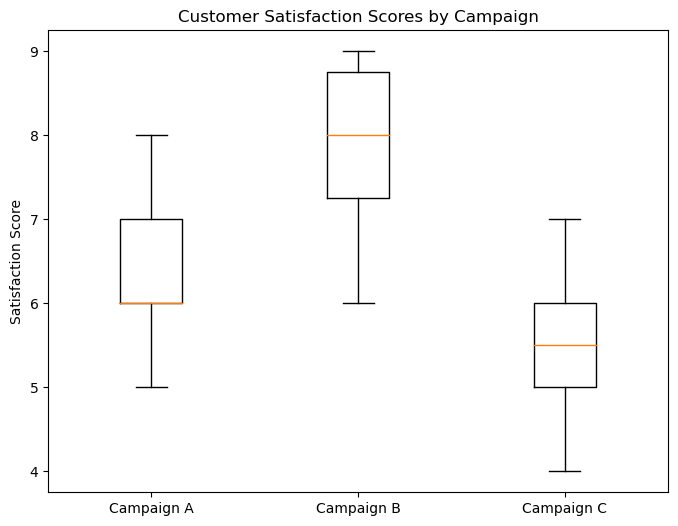

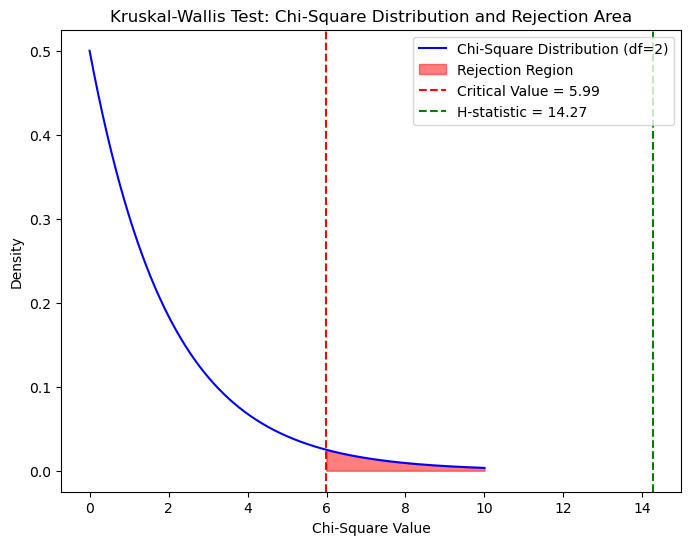

In [99]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample Data: Satisfaction scores for three campaigns
data = {
    'Campaign A': [6, 7, 8, 5, 6, 7, 8, 6, 5, 6],
    'Campaign B': [8, 9, 7, 6, 8, 9, 7, 8, 9, 8],
    'Campaign C': [4, 5, 6, 7, 5, 6, 6, 7, 4, 5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Perform Kruskal-Wallis H Test
H_statistic, p_value = stats.kruskal(df['Campaign A'], df['Campaign B'], df['Campaign C'])

# Print the test statistic and p-value
print("Kruskal-Wallis Test")
print("H-statistic:", H_statistic)
print("P-value:", p_value)

# Critical value (Chi-Square distribution) for df=2 (3 groups - 1 = 2 degrees of freedom) and alpha = 0.05
critical_value = stats.chi2.ppf(1 - 0.05, df=2)
print("Critical value (from Chi-Square distribution):", critical_value)

# Interpretation
if H_statistic > critical_value:
    print("Reject the null hypothesis: There is a significant difference between the campaigns.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the campaigns.")

# Visualization: Kruskal-Wallis Test results
# Boxplot of satisfaction scores for the campaigns
plt.figure(figsize=(8, 6))
plt.boxplot([df['Campaign A'], df['Campaign B'], df['Campaign C']], labels=['Campaign A', 'Campaign B', 'Campaign C'])
plt.title("Customer Satisfaction Scores by Campaign")
plt.ylabel("Satisfaction Score")

# Plot the Chi-Square distribution and highlight the rejection area
x = np.linspace(0, 10, 1000)
y = stats.chi2.pdf(x, df=2)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Chi-Square Distribution (df=2)", color='blue')
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label="Rejection Region")
plt.axvline(x=critical_value, color='red', linestyle='--', label=f"Critical Value = {critical_value:.2f}")
plt.axvline(x=H_statistic, color='green', linestyle='--', label=f"H-statistic = {H_statistic:.2f}")
plt.title("Kruskal-Wallis Test: Chi-Square Distribution and Rejection Area")
plt.xlabel("Chi-Square Value")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.show()


In [ ]:
#Spearman

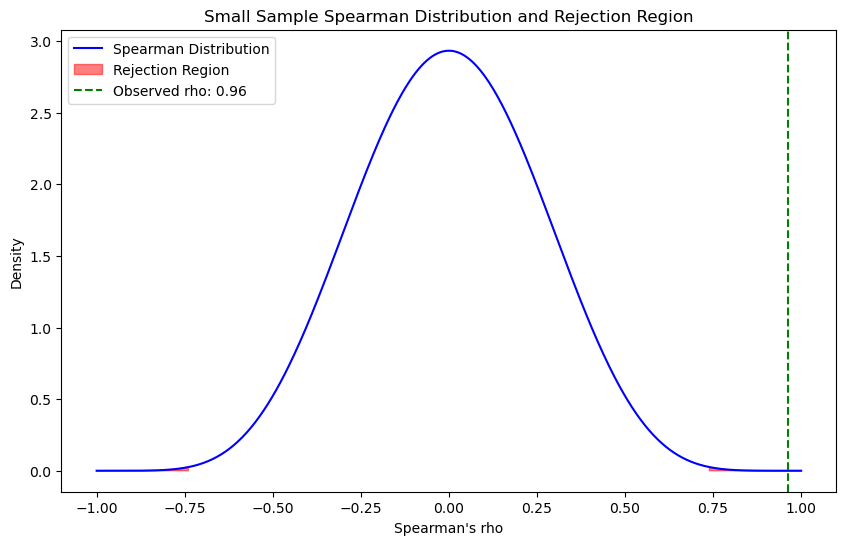

Spearman Rank Correlation Test (Small Sample)
Spearman's rho: 0.96
p-value: 0.0001
Critical value: ±0.738
Result: Reject H0


In [107]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# --- Data: Ordinal Ratings ---
satisfaction = [5, 4, 3, 4, 2, 1, 3, 2]  # Customer satisfaction ratings
purchase_frequency = [5, 4, 3, 3, 2, 1, 3, 2]  # Purchase frequency ratings

# --- Calculate Spearman's Rank Correlation ---
rho, p_value = stats.spearmanr(satisfaction, purchase_frequency)

# Critical value for Spearman's rho (small sample, n=8, alpha=0.05, two-tailed)
critical_value = 0.738  # Looked up from Spearman's critical value table for n=8, alpha=0.05

# --- Visualization of Spearman Distribution and Rejection Area ---
x = np.linspace(-1, 1, 500)
critical_region = np.abs(x) >= critical_value
plt.figure(figsize=(10, 6))
plt.plot(x, stats.beta.pdf((x + 1) / 2, len(satisfaction) - 1, len(purchase_frequency) - 1), label="Spearman Distribution", color="blue")
plt.fill_between(x, 0, stats.beta.pdf((x + 1) / 2, len(satisfaction) - 1, len(purchase_frequency) - 1), where=critical_region, color="red", alpha=0.5, label="Rejection Region")
plt.axvline(rho, color="green", linestyle="--", label=f"Observed rho: {rho:.2f}")
plt.title("Small Sample Spearman Distribution and Rejection Region")
plt.xlabel("Spearman's rho")
plt.ylabel("Density")
plt.legend()
plt.show()

# --- Results ---
print("Spearman Rank Correlation Test (Small Sample)")
print(f"Spearman's rho: {rho:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical value: ±{critical_value}")
print("Result: Reject H0" if abs(rho) >= critical_value else "Result: Fail to Reject H0")


In [108]:
import scipy.stats as stats
import numpy as np

# Parameters
n = 20  # Sample size
alpha = 0.05  # Significance level for two-tailed test
df = n - 2  # Degrees of freedom

# Calculate critical t-value
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Calculate critical r-value
r_critical = np.sqrt(t_critical**2 / (t_critical**2 + df))

# Display results
print("Degrees of Freedom (df):", df)
print("Critical t-value:", t_critical)
print("Critical r-value:", r_critical)


Degrees of Freedom (df): 18
Critical t-value: 2.10092204024096
Critical r-value: 0.4437633993377737
